# Проект «Вольный луг»



    Задача заключается в том, чтобы помочь фермеру автоматизировать процесс отбора коров для его молочного хозяйства с использованием методов машинного обучения. Для принятия решений фермеру требуется точная оценка двух ключевых показателей:
    
    1. Годовой удой коровы — необходимо спрогнозировать, сможет ли корова производить не менее 6000 килограммов молока в год.
    2. Качество молока — требуется рассчитать вероятность того, что молоко будет соответствовать строгим вкусовым критериям фермера.

    Фермеру важно минимизировать риски и получить объективные данные, чтобы исключить человеческий фактор и избежать возможных манипуляций со стороны продавцов коров. Для этого будет разработана система, которая на основе предоставленных данных сможет помочь фермеру принять обоснованные решения при покупке коров, соответствующих его целям по удою и качеству молока. 
    
___________________________________________________________________________________________________________________

## План работы 


**Шаг 1. Необходимо загрузить и изучить данные.**
    Необходимо загрузить данные в датафреймы pandas. Необходимо изучить данные и определить, соответствуют ли они описанию задачи и стандартам, изученным в прошлых спринтах. При необходимости переименовать столбцы.
    
    
**Шаг 2. Необходимо выполнить предобработку данных.** Данные необходимо проверить на наличие пропусков и дубликатов, а также убедиться, что типы данных каждого признака корректны. При необходимости следует устранить выявленные проблемы с данными.


**Шаг 3. Необходимо провести исследовательский анализ данных.** Следует провести статистический анализ всех признаков, построить соответствующие графики для количественных и категориальных признаков. Необходимо сделать выводы о данных: выявить выбросы, необычные распределения или другие особенности. Также необходимо определить, каким образом данные можно улучшить.


**Шаг 4. Необходимо провести корреляционный анализ признаков в датасете ferma_main.csv.** Необходимо изучить взаимосвязь между признаками, рассчитав коэффициенты корреляции между всеми признаками. Построить диаграммы рассеяния (scatterplot) для признака "Удой, кг" и других количественных признаков, учитывая значения категориальных признаков. Например, диаграмма рассеяния для "Удой, кг" и "Сырой протеин, г", где цвет точек будет соответствовать признаку "Порода". Необходимо сделать выводы о взаимосвязи между признаками и проанализировать, существуют ли нелинейные зависимости и мультиколлинеарность.


**Шаг 5. Необходимо решить задачу регрессии.** Необходимо обучить три модели простой линейной регрессии. Для первой модели необходимо использовать данные датасета ferma_main.csv, а в качестве целевого признака выбрать "Удой, кг". Необходимо отобрать признаки, подходящие для модели линейной регрессии, и аргументировать выбор. Необходимо разделить данные на тренировочную и тестовую выборки, закодировать категориальные признаки с помощью OneHotEncoder, а количественные признаки — с помощью StandardScaler. После этого обучить модель и оценить её качество на тестовой выборке, рассчитать R², а также проанализировать остатки с помощью графиков. Далее необходимо повторить этот процесс для двух других моделей с учётом предложенных изменений, таких как устранение нелинейных зависимостей и добавление нового признака "Имя Папы" из датасета ferma_dad.csv.


**Шаг 6. Необходимо решить задачу классификации.** Для решения задачи классификации необходимо обучить модель логистической регрессии на данных из ferma_main.csv, используя в качестве целевого признака "Вкус молока". Необходимо преобразовать или добавить новые признаки, а затем разделить данные на тренировочную и тестовую выборки. Категориальные признаки необходимо закодировать с помощью OneHotEncoder, а количественные — масштабировать с помощью StandardScaler. После обучения модели необходимо оценить её качество с использованием метрик accuracy, recall, precision, а также построить матрицу ошибок. Важно проанализировать критичность ошибок первого и второго рода и выбрать более важную метрику для заказчика, который заинтересован в качестве вкуса молока. При необходимости необходимо изменить порог принадлежности к классам и пересчитать метрики.


**Шаг 7. Необходимо сделать итоговые выводы.** Прогнозы по удою и вкусу молока коров «ЭкоФермы» следует добавить в датафрейм с данными о коровах, которых фермер рассматривает для покупки. Необходимо отобрать коров, у которых удой прогнозируется более 6000 кг в год и вкусное молоко. Кратко описать результаты работы моделей и дать рекомендации фермеру. Необходимо подвести итоги по моделям линейной и логистической регрессии, а также оценить возможности для дальнейшего улучшения моделей.

___________________________________________________________________________________________________________________

##  Шаг 1. Загрузка данных

In [1]:
# библиотеки

!pip install phik -q
!pip install -U scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

RANDOM_STATE = 42

plt.rcParams["figure.figsize"] = (14, 7)

     |████████████████████████████████| 13.4 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 100.4 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
# загрузка данных

try:
    df_main = pd.read_csv('C:/Users/Student/Desktop/ferma_main.csv', sep=';')
    df_dad = pd.read_csv('C:/Users/Student/Desktop/ferma_dad.csv', sep=';')
    df_cow = pd.read_csv('C:/Users/Student/Desktop/cow_buy.csv', sep=';')
except:
    df_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
    df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    df_cow = pd.read_csv('/datasets/cow_buy.csv', sep=';')

In [3]:
#функция для вывода первых строк и информации о наборе данных
def datasets(dataset, dataset_name):
    print()
    print(f"Dataset: {dataset_name}")
    display(dataset.head())
    print("\nInfo:")
    dataset.info()
    print("_" * 60)


# Применение функции для каждого набора данных
datasets(df_main, "Main data")
datasets(df_dad, "Cow's Dads name Data")
datasets(df_cow, "EcoFarm Cows Data")


Dataset: Main data


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст     

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
____________________________________________________________

Dataset: EcoFarm Cows Data


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
____________________________________________________________


### Изучите данные. Определите, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости переименуйте столбцы.

In [4]:
# df_main исправим и переменуем столбцы, а также приведем столбцы к соотвествующему типу

df_main.columns = [
    'id', 'udoy_kg', 'eke', 
    'siroy_protein_g', 'spo', 'poroda',
    'tip_pastbishcha', 'poroda_papy_byka', 'zhirnost', 'belok', 
    'vkus_moloka', 'vozrast'
]

df_main.head()

,id,udoy_kg,eke,siroy_protein_g,spo,poroda,tip_pastbishcha,poroda_papy_byka,zhirnost,belok,vkus_moloka,vozrast
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [5]:
# df_dad исправим и переменуем столбцы, а также приведем столбцы к соотвествующему типу
df_dad.columns = [
    'id', 'imya_papy'
]

df_dad.head()

,id,imya_papy
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
# df_cow исправим и переменуем столбцы, а также приведем столбцы к соотвествующему типу

df_cow.columns = [
    'poroda', 'tip_pastbishcha', 'poroda_papy_byka', 'imya_papy', 
    'tekushchaya_zhirnost', 'tekushchiy_uroven_belok', 'vozrast'
]

df_cow.head()

,poroda,tip_pastbishcha,poroda_papy_byka,imya_papy,tekushchaya_zhirnost,tekushchiy_uroven_belok,vozrast
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


___________________________________________________________________________________________________________________
**Вывод:** 

- Все файлы были загружены способом try except, также убраны разделитили между названиями ";"
- Все столбцы приведены к единому стилю оформления — «змеиный_регистр».
- Убраны пробелы и процентные символы для простоты обращения.
- Столбцы переименованы для обеспечения единообразия и соответствия описанию задачи.
___________________________________________________________________________________________________________________

##  Шаг 2. Предобработка данных

### 2.1. Проверьте данные на наличие пропусков и дубликатов. Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

In [7]:
#функция для вывода информации о наборе данных
def dataset_info(dataset):
    print("\nInfo:")
    dataset.info()
    print("_" * 60)

dataset_info(df_main)
dataset_info(df_dad)
dataset_info(df_cow)


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                634 non-null    int64 
 1   udoy_kg           634 non-null    int64 
 2   eke               634 non-null    object
 3   siroy_protein_g   634 non-null    int64 
 4   spo               634 non-null    object
 5   poroda            634 non-null    object
 6   tip_pastbishcha   634 non-null    object
 7   poroda_papy_byka  634 non-null    object
 8   zhirnost          634 non-null    object
 9   belok             634 non-null    object
 10  vkus_moloka       634 non-null    object
 11  vozrast           634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB
____________________________________________________________

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column     Non-N

In [8]:
# переведем типы с object на float, заменим запятные на точки и в столбце 'vozrast' заменем нижний пробел на пробел
df_main[['eke', 'spo', 'zhirnost', 'belok']] = \
    df_main[['eke', 'spo', 'zhirnost', 'belok']].apply(lambda x: x.str.replace(',', '.').astype(float))
df_main['vozrast'] = df_main['vozrast'].str.replace('_', ' ')


In [9]:
#был таким
#df_cow[['tekushchaya_zhirnost', 'tekushchiy_uroven_belok']] = df_cow[['tekushchaya_zhirnost', 'tekushchiy_uroven_belok']].apply(lambda x: x.str.replace(',', '.').astype(float))

#стал таким(ниже): добавили \

In [10]:
# переведем типы с object на float, заменим запятные на точки и в столбце 'vozrast' заменем нижний пробел на пробел

df_cow[['tekushchaya_zhirnost', 'tekushchiy_uroven_belok']] = \
    df_cow[['tekushchaya_zhirnost', 'tekushchiy_uroven_belok']].apply(lambda x: x.str.replace(',', '.').astype(float))
df_cow['vozrast'] = df_main['vozrast'].str.replace('_', ' ')


In [11]:
# проверим 

dataset_info(df_main)
dataset_info(df_dad)
dataset_info(df_cow)


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   udoy_kg           634 non-null    int64  
 2   eke               634 non-null    float64
 3   siroy_protein_g   634 non-null    int64  
 4   spo               634 non-null    float64
 5   poroda            634 non-null    object 
 6   tip_pastbishcha   634 non-null    object 
 7   poroda_papy_byka  634 non-null    object 
 8   zhirnost          634 non-null    float64
 9   belok             634 non-null    float64
 10  vkus_moloka       634 non-null    object 
 11  vozrast           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB
____________________________________________________________

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 colum

In [12]:
# проверяем на пропуски

display(df_main.isna().sum())
print("_" * 50)
display(df_dad.isna().sum())
print("_" * 50)
display(df_cow.isna().sum())

id                  0
udoy_kg             0
eke                 0
siroy_protein_g     0
spo                 0
poroda              0
tip_pastbishcha     0
poroda_papy_byka    0
zhirnost            0
belok               0
vkus_moloka         0
vozrast             0
dtype: int64

__________________________________________________


id           0
imya_papy    0
dtype: int64

__________________________________________________


poroda                     0
tip_pastbishcha            0
poroda_papy_byka           0
imya_papy                  0
tekushchaya_zhirnost       0
tekushchiy_uroven_belok    0
vozrast                    0
dtype: int64

In [13]:
#проверяем на дубликаты 

display(df_main.duplicated().sum())
display(df_dad.duplicated().sum())
display(df_cow.duplicated().sum())


5

0

3

In [14]:
#посмотрим какие именно дублируются

df_main[df_main.duplicated()]

,id,udoy_kg,eke,siroy_protein_g,spo,poroda,tip_pastbishcha,poroda_papy_byka,zhirnost,belok,vkus_moloka,vozrast
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более 2 лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более 2 лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более 2 лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более 2 лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более 2 лет


In [15]:
#посмотрим какие именно дублируются (но тут удалять не будем)

df_cow[df_cow.duplicated()]

#в тестовой выборке мы не правомочны что либо удалять - 
#эти данные поступают на вход обученной модели и по ним должны быть сделаны "предсказания".
#Нет никакой разницы есть ли дубли в тестовой выборке или нет:
#**это данные по которым ДОЛЖНЫ БЫТЬ сделаны "предсказания"**

,poroda,tip_pastbishcha,poroda_papy_byka,imya_papy,tekushchaya_zhirnost,tekushchiy_uroven_belok,vozrast
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет


In [16]:
df_main = df_main.drop_duplicates()


In [17]:
display(df_main.duplicated().sum())
display(df_dad.duplicated().sum())
display(df_cow.duplicated().sum())

0

0

3

In [18]:
# неявные дубликаты df_main

display(df_main['tip_pastbishcha'].unique())
display(df_main['poroda_papy_byka'].unique())
display(df_main['poroda'].unique())
display(df_cow['poroda'].unique())



df_main['tip_pastbishcha'] = df_main['tip_pastbishcha'].replace({
    'Равнинные': 'Равнинное'
})
df_main['poroda_papy_byka'] = df_main['poroda_papy_byka'].replace({
    'Айдиалл': 'Айдиал'
})
df_main['poroda'] = df_main['poroda'].replace({
    'РефлешнСоверинг': 'Рефлешн Соверинг'
})
df_cow['poroda'] = df_cow['poroda'].replace({
    'РефлешнСоверинг': 'Рефлешн Соверинг'
})

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [19]:
display(df_cow['tip_pastbishcha'].unique())

df_cow['tip_pastbishcha'] = df_cow['tip_pastbishcha'].replace({
    'холмистое': 'Холмистое',
    'равнинное': 'Равнинное'
})

array(['холмистое', 'равнинное'], dtype=object)

**Вывод**:

- Нашли типы object которые надо было перевести в float в `df_main` и `df_cow`


- В столбцах `vozrast` float в `df_main` и `df_cow` заменили нижний проблем между словами '_' на пустую строку/пробел ' '


- Пропусков не имеется, дубликаты устранены. В `df_main` было 5 и в `df_cow` было 3 дубликатов.


- В столбце `'tip_pastbishcha'` в `df_main` был найден неявный дубликат 'Равнинные', который заменен на 'Равнинное'.


- В столбце `'poroda_papy_byka'` в `df_main` был найден неявный дубликат 'Айдиалл' который заменен на 'Айдиал'.

- В столбце `'tip_pastbishcha'` в `df_cow` прописали значения с большой буквы для эдентичности с `df_main`

- В столбце `'poroda'` в `df_main` разделили пробелом породу 'РефлешнСоверинг' - 'Рефлешн Соверинг'

___________________________________________________________________________________________________________________

## Шаг 3. Исследовательский анализ данных

### Проведите статистический анализ всех признаков.

In [20]:
# Установим формат для отображения float-значений

display(df_main.describe().T)
print('_' * 80)
display(df_cow.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
udoy_kg,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
eke,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
siroy_protein_g,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
spo,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
zhirnost,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
belok,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


________________________________________________________________________________


,count,mean,std,min,25%,50%,75%,max
tekushchaya_zhirnost,20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
tekushchiy_uroven_belok,20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


In [21]:
display(df_main.describe(include=['object']).T)
print('_' * 80)
display(df_dad.describe(include=['object']).T)
print('_' * 80)
display(df_cow.describe(include=['object']).T)

,count,unique,top,freq
poroda,629,2,Вис Бик Айдиал,373
tip_pastbishcha,629,2,Холмистое,351
poroda_papy_byka,629,2,Айдиал,318
vkus_moloka,629,2,вкусно,371
vozrast,629,2,более 2 лет,519


________________________________________________________________________________


,count,unique,top,freq
imya_papy,629,4,Барин,240


________________________________________________________________________________


,count,unique,top,freq
poroda,20,2,Рефлешн Соверинг,11
tip_pastbishcha,20,2,Равнинное,11
poroda_papy_byka,20,2,Соверин,12
imya_papy,20,4,Буйный,8
vozrast,20,2,более 2 лет,15


**df_main:**
- udoy_kg: среднее - 6188.75,медиана - 6133, медиана и среднее почти совпадают, присутсвует аномальный выброс с максимальным значением 45616.
- eke: среднее - 14.54, медиана - 14.7 среднее немного ниже медианы, что может говорить о наличии некоторых низких значений, влияющих на общее среднее, хотя разброс небольшой.
- siroy_protein_g: среднее - 1923.36, медиана - 1888 медиана чуть ниже среднего, что может указывать на небольшой сдвиг распределения вверх.
- spo: среднее - 0.91 медиана - 0.93 медиана немного выше среднего, но разброс значений минимален, что указывает на стабильный показатель.
- zhirnost: среднее - 3.60% медиана - 3.65% небольшое отличие медианы от среднего говорит о высокой стабильности жирности молока.
- belok (белок): среднее - 3.08% медиана - 3.076% среднее и медиана практически совпадают, что указывает на стабильность содержания белка в молоке.

- poroda: основная порода Вис Бик Айдиал (373 случая из 629)
- tip_pastbishcha: основной тип Холмистое (351 случай из 629)
- poroda_papy_byka: основной тип Айдиал (318 случаев из 629)
- vkus_moloka: преобладающее мнение вкусно (371 случай из 629)
- vozrast: преобладающая возрастная группа: более 2 лет (519 случаев из 629)

**df_cow:**

- tekushchaya_zhirnost: среднее - 3.5775%, медиана - 3.590%. Медиана чуть выше среднего, что может указывать на устойчивое содержание жира в молоке. Максимальное значение 3.770% может быть аномальным выбросом.
- tekushchiy_uroven_belok: среднее - 3.0695%, медиана - 3.074%. Среднее и медиана почти совпадают, что указывает на стабильное содержание белка, а разброс значений минимален.

- poroda: основная порода — Рефлешн Соверинг (11 случаев из 20).
- tip_pastbishcha: основной тип пастбища — Равнинное (11 случаев из 20).
- poroda_papy_byka: основная порода быка-отца — Соверин (12 случаев из 20).
- imya_papy: наиболее частое имя быка-отца — Буйный (8 случаев из 20).
- vozrast: преобладающая возрастная группа — более 2 лет (15 случаев из 20).

**df_dad:**

- imya_papy: основное имя быка-отца — Барин, встречающееся 240 раз из 629.

### Постройте графики для каждого признака. Помните, что количественным и категориальным признакам подходят разные графики.

In [22]:
#функция для построения гистограмм и диаграмм размаха для количественных признаков

def plot_box_and_hist(df, column, bins=10):
    
    fig, axes = plt.subplots(1, 2)  
    
    #диаграмма размаха
    
    axes[0].boxplot(df[column], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
    axes[0].set_title(f'Диаграмма размаха для {column}')
    axes[0].set_ylabel(column)
    axes[0].grid(True)
    
    #гистограмма
    
    axes[1].hist(df[column], bins=bins, color='skyblue', edgecolor='black')
    axes[1].set_title(f'Гистограмма для {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Частота')
    axes[1].grid(True)
    

    plt.tight_layout()
    plt.show()
               
        
#функция для построения столбчатых диаграмм для категориальных признаков

def plot_categorical_bars(df, columns):
    for column in columns:
        plt.figure(figsize=(7, 5))
        df[column].value_counts().plot(kind='bar', color='darkgreen', edgecolor='black')
        plt.title(f'Распределение {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

                                   Графики и диаграммы размаха для количественных признаков df_main

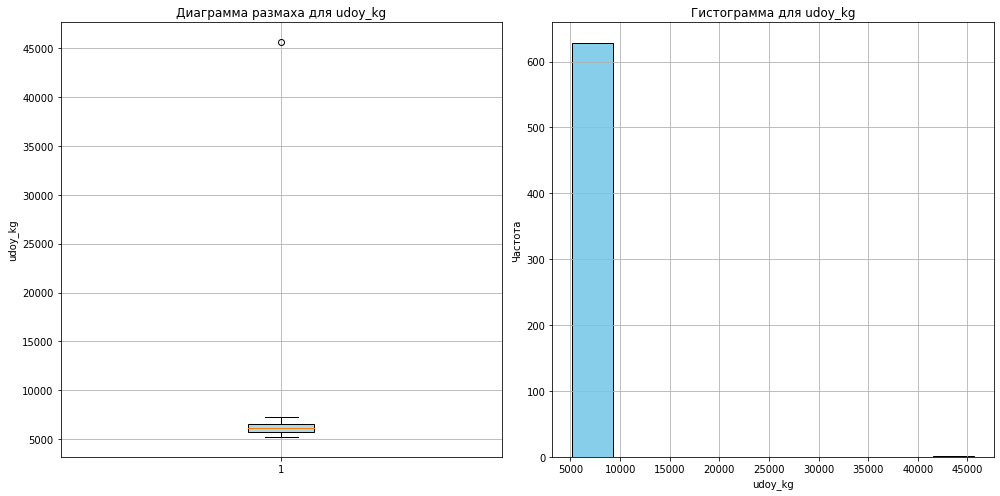

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: udoy_kg, dtype: float64

In [23]:
plot_box_and_hist(df_main, 'udoy_kg')
df_main['udoy_kg'].describe()

In [24]:
# удалим аномальное значение

df_main = df_main.query('udoy_kg != 45616')

#проверяем

df_main['udoy_kg'].describe().T[['count', 'max']]

count     628.0
max      7222.0
Name: udoy_kg, dtype: float64

___________________________________________________________________________________________________________________
**Годовой удой (udoy_kg):** распределение удоя коров в целом находится в разумных пределах, но максимальное значение удоя (45,616 кг) явно выделяется как выброс. Так как данный факт является аномальным значением его мы удалили.  

_________________________________________________________________________________________________________________

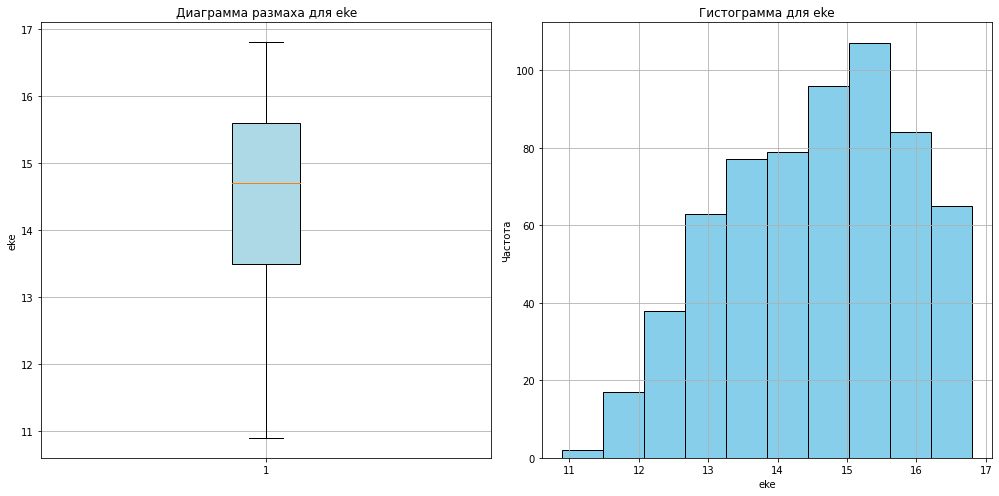

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: eke, dtype: float64

In [25]:
plot_box_and_hist(df_main, 'eke')
df_main['eke'].describe()

___________________________________________________________________________________________________________________
**Энергетическая кормовая единица (eke)**: распределение данного признака имеется смещение вправо. Никаких явных выбросов не видно, диапазон значений — от 10.9 до 16.8.

___________________________________________________________________________________________________________________

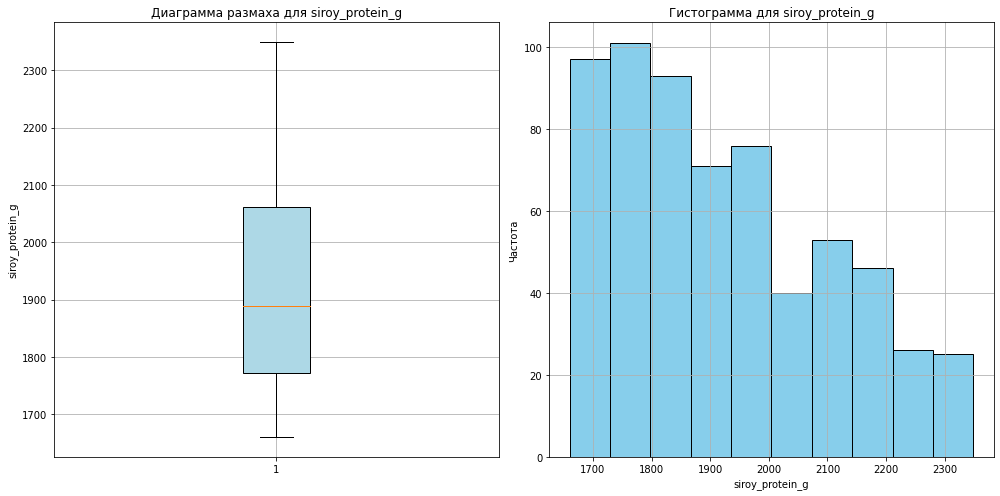

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: siroy_protein_g, dtype: float64

In [26]:
plot_box_and_hist(df_main, 'siroy_protein_g')
df_main['siroy_protein_g'].describe()

___________________________________________________________________________________________________________________

**Сырой протеин, г (siroy_protein_g)**: среднее значение 1923 г, диапазон от 1660 г до 2349 г. Распределение близко к нормальному.
___________________________________________________________________________________________________________________

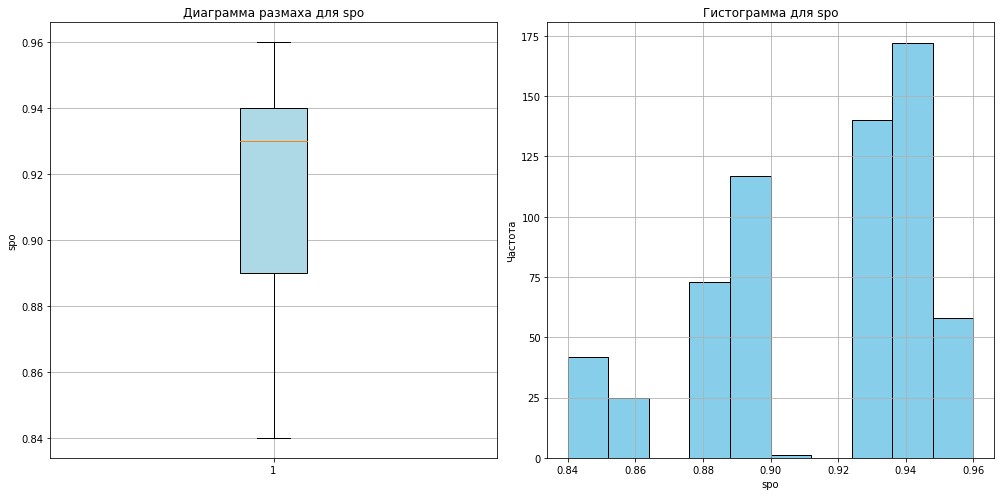

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: spo, dtype: float64

In [27]:
plot_box_and_hist(df_main, 'spo')
df_main['spo'].describe()

___________________________________________________________________________________________________________________

**Сахаро-протеиновое соотношение (spo)**: распределение признака имеет небольшой диапазон (от 0.84 до 0.96), что показывает стабильность. Явных выбросов не наблюдается.
___________________________________________________________________________________________________________________

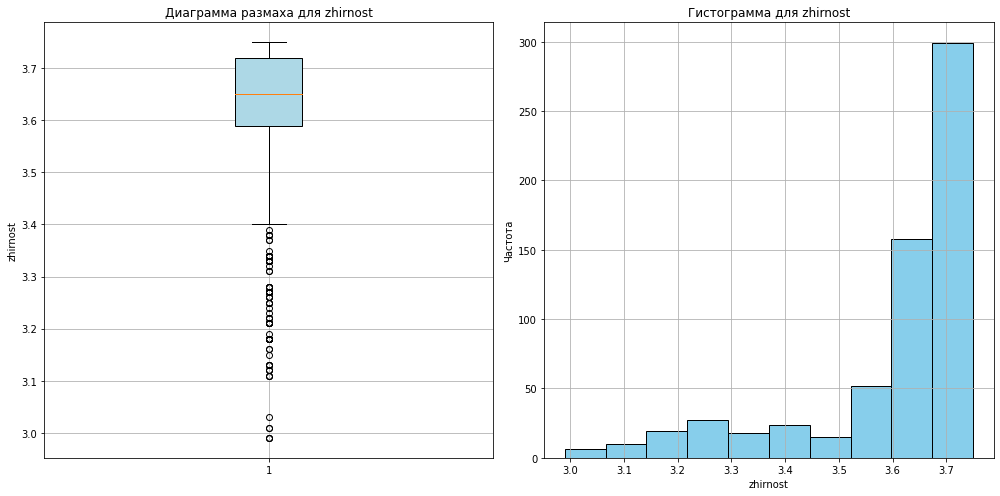

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: zhirnost, dtype: float64

In [28]:
plot_box_and_hist(df_main, 'zhirnost')
df_main['zhirnost'].describe()

In [29]:
#посчитаем сколько строк у столбца 'zhirnost' ниже 3.4 и общее количество датафрейма

outliers_count = df_main[df_main['zhirnost'] < 3.4].shape[0]
total_count = df_main.shape[0]

#выведем их 

display(outliers_count)
display(total_count)

#отсюда посчитаем процент выбросов 

percentage_outliers = (outliers_count / total_count) * 100
print(f"Процент выбросов: {percentage_outliers:.2f}%")



86

628

Процент выбросов: 13.69%


___________________________________________________________________________________________________________________

**Жирность (zhirnost)**: наблюдается выбросы ниже порога 3.4, удалить их не видется целесобразным так как удаление 13.69% это большая часть данных. Обычно не более 10% удаляется. 
___________________________________________________________________________________________________________________

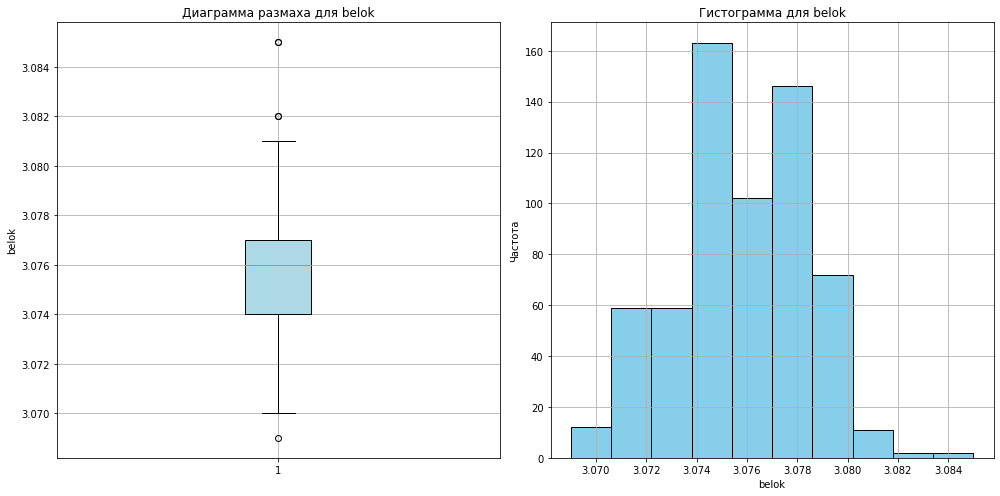

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: belok, dtype: float64

In [30]:
plot_box_and_hist(df_main, 'belok')
df_main['belok'].describe()

В низу указан старый код, я его закоментировал, так как в нем я удалил, как я понимал, выбросы смотря да боксплот. Не имея должного знания в специфике я принял решения удалить эти данные). Хотя их надо оставить или если будет возможность найти специалиста в этой сфере, то посоветоваться с ним. 

In [31]:
#найдем количество выбросов ниже 3.069 и выше 3.081

#outliers_below = df_main[df_main['belok'] < 3.069].shape[0]
#outliers_above = df_main[df_main['belok'] > 3.081].shape[0]

#общее количество выбросов

#total_outliers = outliers_below + outliers_above
#total_count = df_main.shape[0]

#рассчитаем процент выбросов

#percentage_outliers = (total_outliers / total_count) * 100

#print(f"Процент выбросов: {percentage_outliers:.2f}%")

In [32]:
#df_main = df_main.query('3.069 < belok < 3.081')

#проверяем

#df_main.info()

___________________________________________________________________________________________________________________
**Белок (belok)**: уровень белка стабилен, колеблется в узком диапазоне от 3.069 до 3.085. Имеются выбросы ниже 3.069 и выше 3.081 общий процент которых составляет 0.64% от общего датафрейма. Они были удалены.
___________________________________________________________________________________________________________________

                                   Графики для категориальных признаков df_main

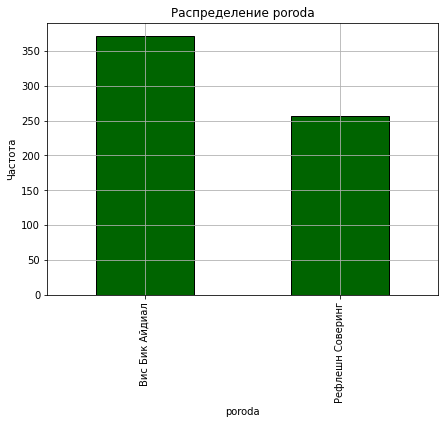

count                628
unique                 2
top       Вис Бик Айдиал
freq                 372
Name: poroda, dtype: object

In [33]:
plot_categorical_bars(df_main, ['poroda'])
df_main['poroda'].describe()

In [34]:
#функция для расчета процентажа значений в столбце

def procent_in_column(df, column):
    procent = (df[column].value_counts(normalize=True) * 100).apply(lambda x: f"{x:.2f}%")
    return procent

In [35]:
#расчитаем процентаж каждой породы
procent_in_column(df_main, 'poroda')

Вис Бик Айдиал      59.24%
Рефлешн Соверинг    40.76%
Name: poroda, dtype: object

___________________________________________________________________________________________________________________
**Порода (poroda)**: распределение пород выглядит сбалансированным, хотя доминирует порода Вис Бик Айдиал. 

**Соотношение:** Вис Бик Айдиал - 58.50%, а Рефлешн Соверинг - 41.50%
___________________________________________________________________________________________________________________

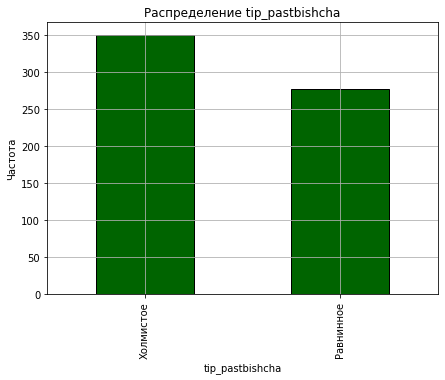

In [36]:
plot_categorical_bars(df_main, ['tip_pastbishcha'])

In [37]:
#расчитаем процентаж каждого типа пастбища
procent_in_column(df_main, 'tip_pastbishcha')

Холмистое    55.73%
Равнинное    44.27%
Name: tip_pastbishcha, dtype: object

___________________________________________________________________________________________________________________
**Тип пастбища (tip_pastbishcha)**: распределение выглядит равномерным.

**Соотношение:** Холмистое - 55.72%, а Равнинное - 44.28%
___________________________________________________________________________________________________________________

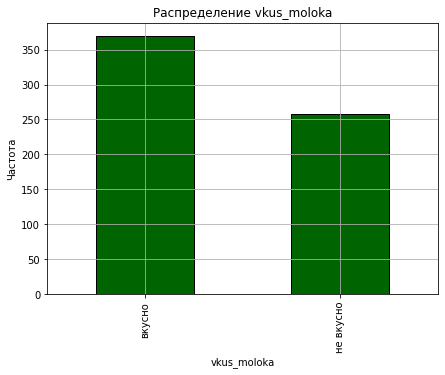

count        628
unique         2
top       вкусно
freq         370
Name: vkus_moloka, dtype: object

In [38]:
plot_categorical_bars(df_main, ['vkus_moloka'])
df_main['vkus_moloka'].describe()

In [39]:
procent_in_column(df_main, 'vkus_moloka')

вкусно       58.92%
не вкусно    41.08%
Name: vkus_moloka, dtype: object

___________________________________________________________________________________________________________________
**Тип пастбища (tip_pastbishcha)**: вкусного молока больше нежели не вкусного.

**Соотношение:** вкусно - 58.33%, а не вкусно - 41.67%
___________________________________________________________________________________________________________________

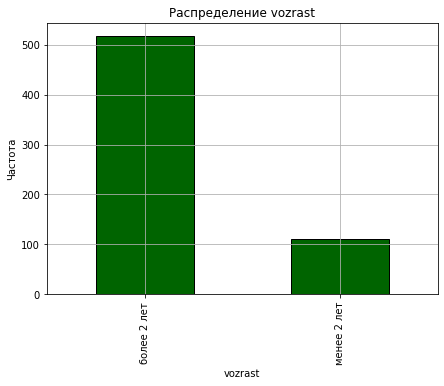

count             628
unique              2
top       более 2 лет
freq              518
Name: vozrast, dtype: object

In [40]:
plot_categorical_bars(df_main, ['vozrast'])
df_main['vozrast'].describe()

In [41]:
procent_in_column(df_main, 'vozrast')

более 2 лет    82.48%
менее 2 лет    17.52%
Name: vozrast, dtype: object

___________________________________________________________________________________________________________________
**Возраст (vozrast)**: основной возраст более 2 лет

**Соотношение:** более 2 лет - 82.68%, а менее 2 лет - 17.32%
___________________________________________________________________________________________________________________

                                   Графики для количественных признаков df_cow

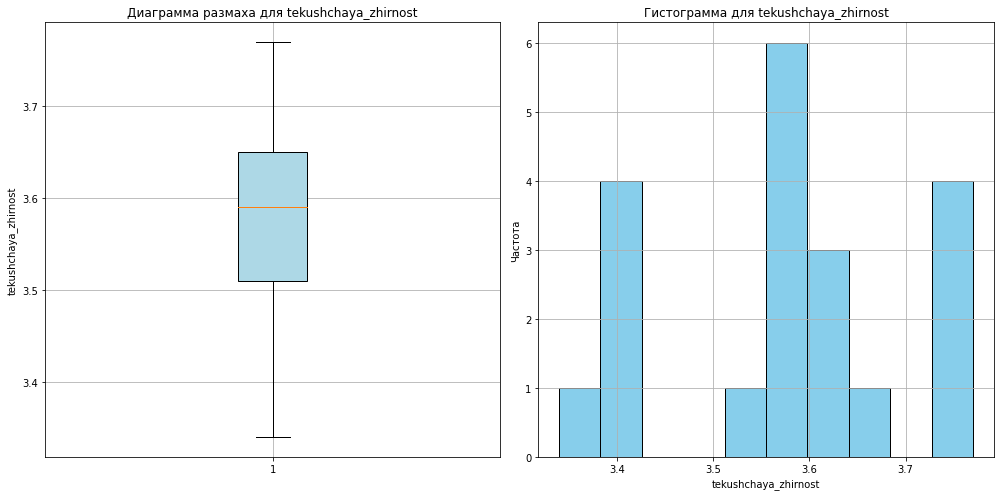

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: tekushchaya_zhirnost, dtype: float64

In [42]:
plot_box_and_hist(df_cow, 'tekushchaya_zhirnost')
df_cow['tekushchaya_zhirnost'].describe()

___________________________________________________________________________________________________________________
**Текущая жирность (tekushchaya_zhirnost)**: значения жирности распределены довольно равномерно, с несколькими пиками, особенно на уровнях 3.4 и 3.7, выбросов нет
___________________________________________________________________________________________________________________

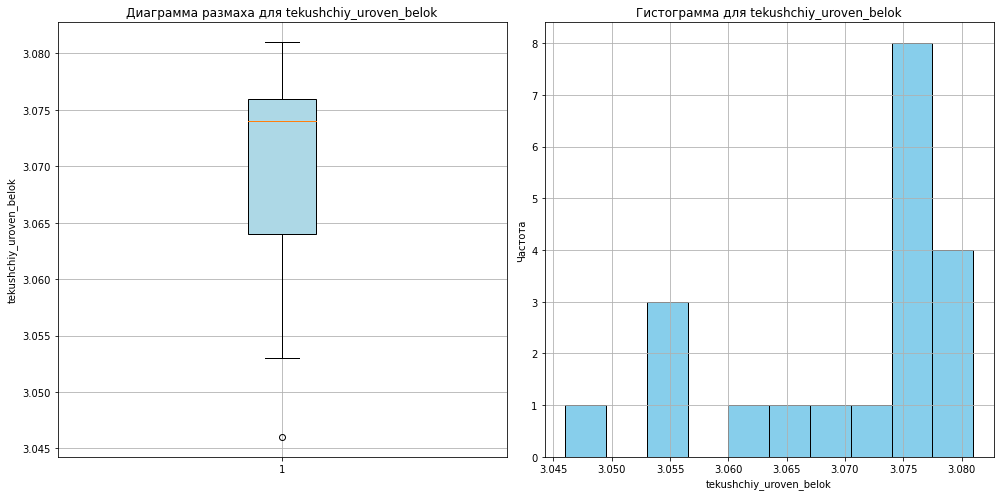

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: tekushchiy_uroven_belok, dtype: float64

In [43]:
plot_box_and_hist(df_cow, 'tekushchiy_uroven_belok')
df_cow['tekushchiy_uroven_belok'].describe()

___________________________________________________________________________________________________________________
**Текущий уровень белка (tekushchiy_uroven_belok)**: распределение белка симметрично и плотное, без выбросов
___________________________________________________________________________________________________________________

                                   Графики для категориальных признаков df_cow

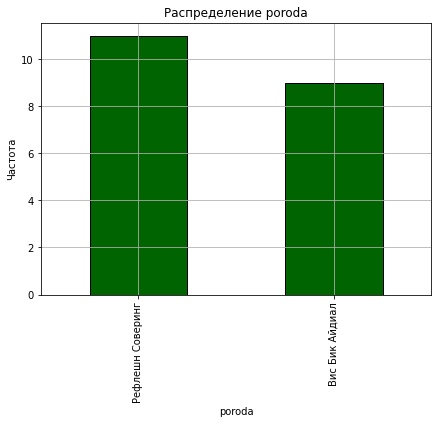

count                   20
unique                   2
top       Рефлешн Соверинг
freq                    11
Name: poroda, dtype: object

In [44]:
plot_categorical_bars(df_cow, ['poroda'])
df_cow['poroda'].describe()

In [45]:
procent_in_column(df_cow, 'poroda')

Рефлешн Соверинг    55.00%
Вис Бик Айдиал      45.00%
Name: poroda, dtype: object

___________________________________________________________________________________________________________________
**Порода (poroda)**: распределение пород выглядит сбалансированным, в отличие от `df_main[poroda]` доминирует порода Рефлешн Соверинг.

**Соотношение:** Рефлешн Соверинг - 52.94%, а Вис Бик Айдиал - 47.06%
___________________________________________________________________________________________________________________

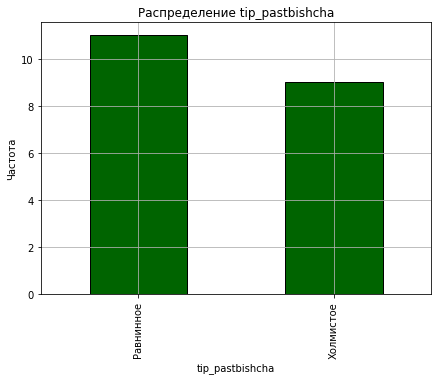

count            20
unique            2
top       Равнинное
freq             11
Name: tip_pastbishcha, dtype: object

In [46]:
plot_categorical_bars(df_cow, ['tip_pastbishcha'])
df_cow['tip_pastbishcha'].describe()

In [47]:
procent_in_column(df_cow, 'tip_pastbishcha')

Равнинное    55.00%
Холмистое    45.00%
Name: tip_pastbishcha, dtype: object

___________________________________________________________________________________________________________________
**Тип пастбища (tip_pastbishcha)**: распределение выглядит равномерным. В отличие от `df_main['tip_pastbishcha']` преобладает Равнинный тип

**Соотношение:** Равнинное - 52.94%, а Холмистое - 47.06%
___________________________________________________________________________________________________________________

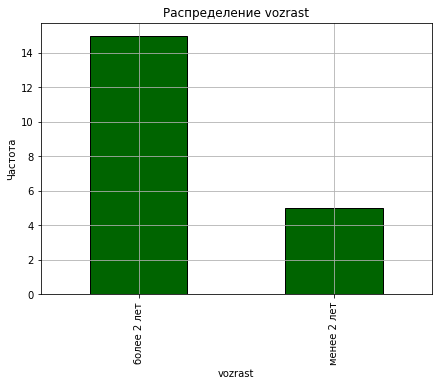

In [48]:
plot_categorical_bars(df_cow, ['vozrast'])

In [49]:
procent_in_column(df_cow, 'vozrast')

более 2 лет    75.00%
менее 2 лет    25.00%
Name: vozrast, dtype: object

___________________________________________________________________________________________________________________
**Возраст (vozrast)**: основной возраст более 2 лет

**Соотношение:** более 2 лет - 70.59%, а менее 2 лет - 29.41%
___________________________________________________________________________________________________________________

                                   График для категориального признака df_dad

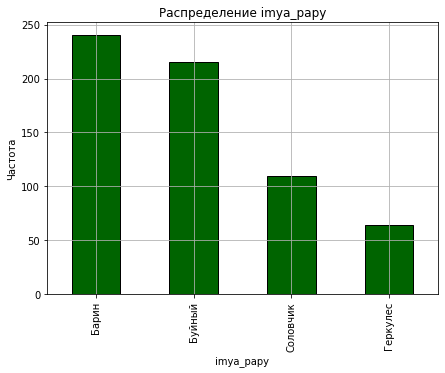

0        Буйный
1      Соловчик
2         Барин
3        Буйный
4         Барин
         ...   
624      Буйный
625       Барин
626       Барин
627       Барин
628    Соловчик
Name: imya_papy, Length: 629, dtype: object

In [50]:
plot_categorical_bars(df_dad, ['imya_papy'])
df_dad['imya_papy']

In [51]:
procent_in_column(df_dad, 'imya_papy')

Барин       38.16%
Буйный      34.18%
Соловчик    17.49%
Геркулес    10.17%
Name: imya_papy, dtype: object

___________________________________________________________________________________________________________________
**Имя Папы (imya_papy)**: приоблодают имена как Барин и Буйный

**Соотношение:** Барин - 38.16%, Буйный - 34.18%, Соловчик - 17.49%, Геркулес - 10.17%
___________________________________________________________________________________________________________________

___________________________________________________________________________________________________________________
**Вывод по исследовательскому анализу данных:**


**Количественные признаки (df_main):**
- Годовой удой: Обнаружен выброс (45,616 кг), который удалён.
- Энергетическая кормовая единица (eke): Есть смещение вправо, без выбросов.
- Сырой протеин (siroy_protein_g): Среднее значение 1923 г, распределение близко к нормальному.
- Сахаро-протеиновое соотношение (spo): Небольшой диапазон (0.84-0.96), стабильное распределение.
- Жирность (zhirnost): Есть выбросы ниже 3.4, удаление нецелесообразно (13.69% данных).
- признаки spo и zhirnost: есть подозрение, что их лучше перевести в категориальную шкалу, т.к. есть большая ассиметрия - скорее всего тут прячутся две-три группы.
___________________________________________________________________________________________________________________

**Категориальные признаки (df_main):**
- Порода (poroda): Доминирует порода Вис Бик Айдиал (58.50%).
- Тип пастбища (tip_pastbishcha): Преобладает холмистый тип (55.72%).
- Возраст (vozrast): Большинство коров старше 2 лет (82.68%).
- Количественные признаки (df_cow):
- Текущая жирность: Равномерное распределение, выбросов нет.
- Текущий уровень белка: Симметричное, плотное распределение, без выбросов.
___________________________________________________________________________________________________________________

**Категориальные признаки (df_cow):**
- Порода: Доминирует порода Рефлешн Соверинг (52.94%).
- Тип пастбища: Преобладает равнинный тип (52.94%).
- Возраст: Большинство коров старше 2 лет (70.59%).
___________________________________________________________________________________________________________________

**Категориальный признак (df_dad):**
- Имя Папы: Доминируют имена Барин (38.16%) и Буйный (34.18%).

## Шаг 4. Корреляционный анализ

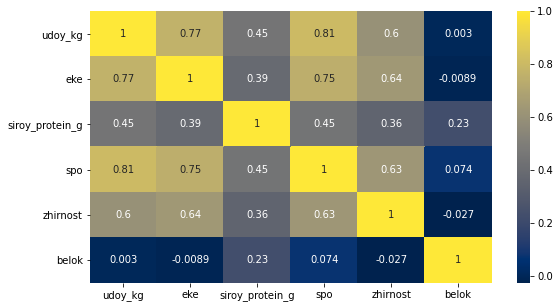

,udoy_kg,eke,siroy_protein_g,spo,zhirnost,belok
udoy_kg,1.000000,0.765098,0.446731,0.806339,0.600902,0.002966
eke,0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939
siroy_protein_g,0.446731,0.387875,1.000000,0.446332,0.357793,0.226802
spo,0.806339,0.749007,0.446332,1.000000,0.629098,0.073718
zhirnost,0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542
belok,0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000


In [52]:
#уберем столбец id так как для корреляции он не имеет смысла

without_id = df_main.drop('id', axis=1)


plt.figure(figsize=(9, 5))
sns.heatmap(without_id.corr(), annot=True, cmap='cividis') 
plt.show()

display(without_id.corr())

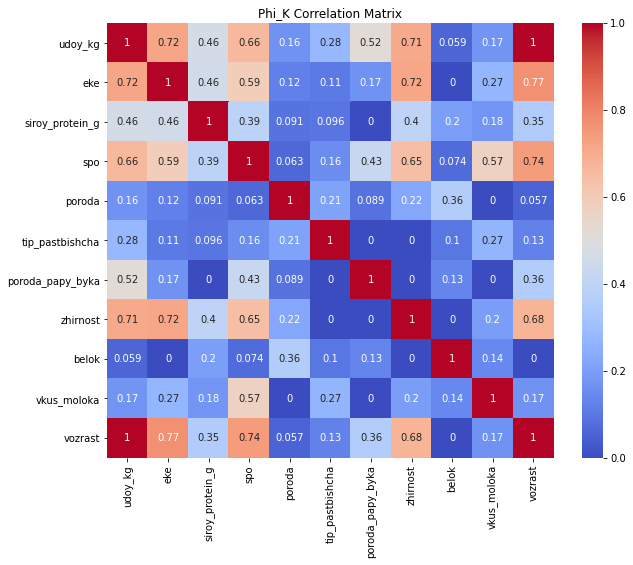

In [53]:
#Phi_K correlation

corr_matrix = without_id.phik_matrix(
    interval_cols=['udoy_kg', 'eke', 'siroy_protein_g', 'spo', 'zhirnost', 'belok']
)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

**udoy_kg** имеет весьма высокую корреляцию с `vozrast (1)`, высокую положительную корреляцию с `eke (0.72), zhirnost (0.71)`, и заметную положительную корреляцию с  `spo (0.66)`. Увеличение удоя связано с увеличением этих признаков.

**eke** демонстрирует высокую положительную корреляцию с `udoy_kg (0.72),zhirnost (0.72) и vozrast (0.77)`, и заметную положительную корреляцию с `spo (0.59)`.

**siroy_protein_g** показывает умеренную положительную корреляцию с `udoy_kg (0.46), zhirnost (0.4), spo (0.39)`.

**spo** имеет высокую положительную корреляцию с `vozrast (0.74)`, и заметную положительную корреляцию с `udoy_kg (0.66), eke (0.59), zhirnost (0.65) и `.

**poroda** имеет слабую положительную корреляцию с `tip_pastbishcha (0.21)` и слабую корреляцию с другими признаками, что указывает на минимальное влияние породы на данные характеристики.

**tip_pastbishcha** имеет слабую положительную корреляцию с `poroda (0.21) и vkus_moloka (0.27)`, что указывает на слабое влияние типа пастбища на вкусовые качества молока.

**poroda_papry_buka** имеет положительную умеренную корреляцию с `vozrast (0.36)`, что может свидетельствовать о связи между возрастом и породой по отцу быка.

**zhirnost** имеет высокую положительную корреляцию с `udoy_kg (0.71), eke (0.72)` и заметную связь с `spo (0.65) и vozrast (0.68)`

**belok** имеет умеренную корреляцию с `poroda (0.36)`.

**vkus_moloka** показывает слабую положительную корреляцию с `tip_pastbishcha (0.27) и poroda (0.18)`, указывая на связь вкуса молока с типом пастбища и породой.

**vozrast** имеет весьма высокую положительную корреляцию с `udoy_kg (1)`, высокую корреляцию с `eke (0.77), spo (0.74)`, и заметную положительную корреляцию с `zhirnost (0.68)`, что свидетельствует о значительном влиянии возраста на удой, энергоёмкость корма, сухое вещество и жирность молока.

**Мультиколлинеарность** заметна между `udoy_kg` и `vozrast`

**udoy_kg (удой в кг)** имеет высокую положительную корреляцию с `eke (0.766251)`, `spo (0.807889)` и заметную положительную с `zhirnost (0.604125)`. Увеличение удоя связано с увеличением этих признаков.


**eke (энергетическая кормовая единица)** высокая положительная корреляция с `udoy_kg (0.766251)`, `spo (0.750448)` и заметную положительную с zhirnost (0.637856). Энергоемкость корма связана с удоем, содержанием сухого остатка и жирностью.


**siroy_protein_g (сырое содержание белка)** положительная умеренная корреляция с `udoy_kg (0.444191)`, `spo (0.445330)` и `zhirnost (0.360590)` увеличение сырого белка связано с увеличением этих признаков, но связь не такая сильная, как в предыдущих случаях.


**spo (сухое вещество)** имеет высокую положительную корреляцию с `udoy_kg (0.807889)`, `eke (0.750448)` и заметную положительную с `zhirnost (0.625781)`.


**zhirnost (жирность молока)** заметная положительная корреляция с `udoy_kg (0.604125)`, `eke (0.637856)` и `spo (0.625781)`, более высокие удои связаны с увеличением жирности.


**belok (содержание белка в молоке)** почти отсутствует связь с другими признаками, за исключением слабой положительной корреляции с `siroy_protein_g (0.218989)`.



In [54]:
df_main.head()

,id,udoy_kg,eke,siroy_protein_g,spo,poroda,tip_pastbishcha,poroda_papy_byka,zhirnost,belok,vkus_moloka,vozrast
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет


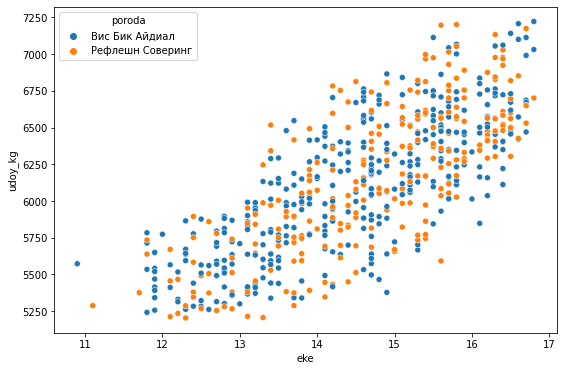

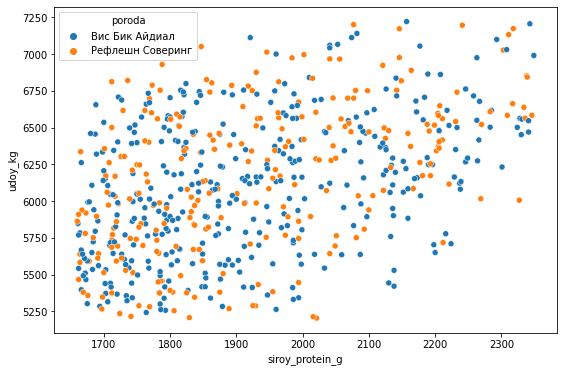

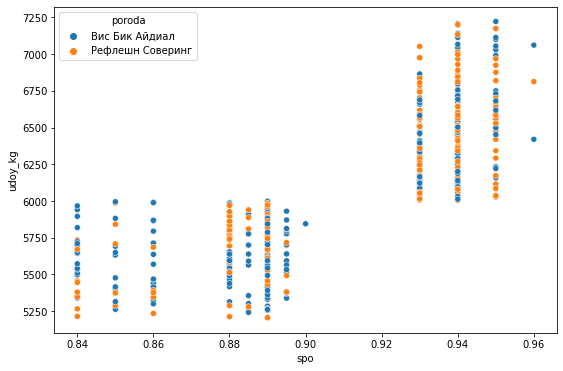

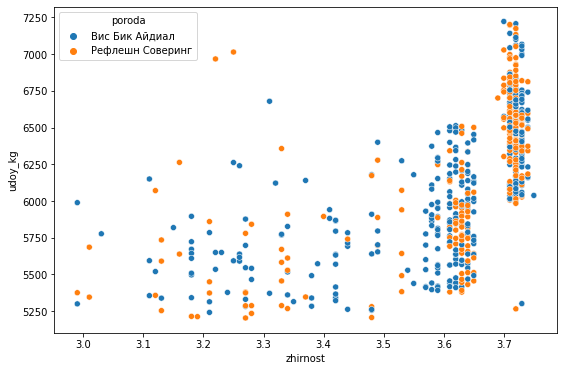

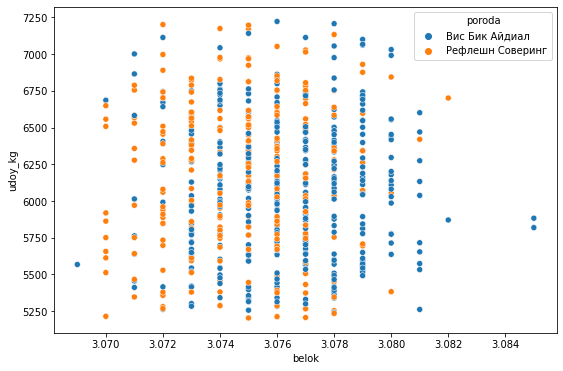

In [55]:
#переберем все количественные признаки

# категориальный признак poroda

df_main_quantative = ['eke', 'siroy_protein_g', 'spo', 'zhirnost', 'belok']
for column in df_main_quantative:
    plt.figure(figsize=(9, 6))
    sns.scatterplot(x=column, y='udoy_kg', hue='poroda', data=df_main)
    plt.show()

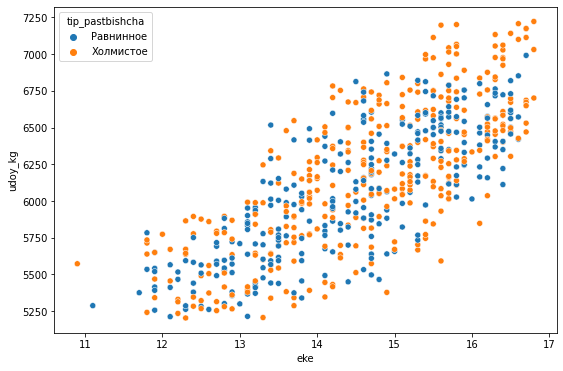

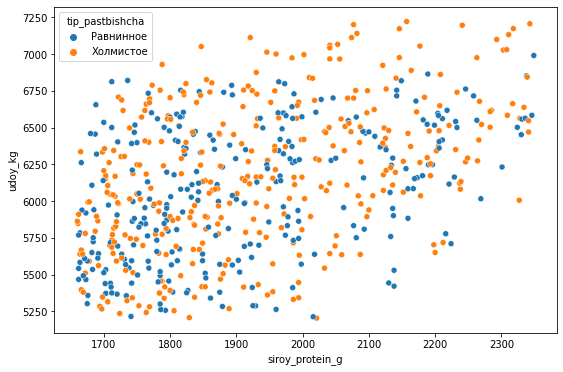

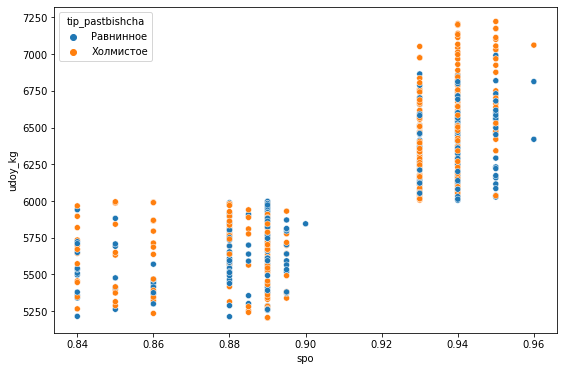

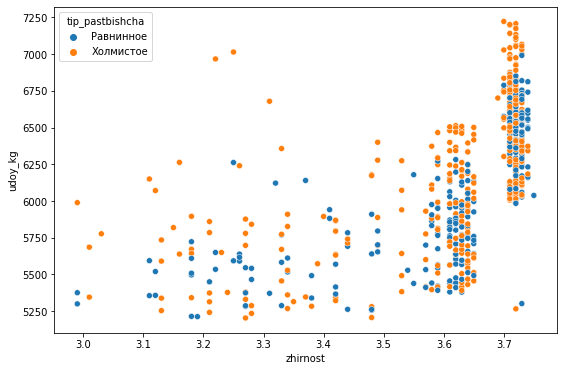

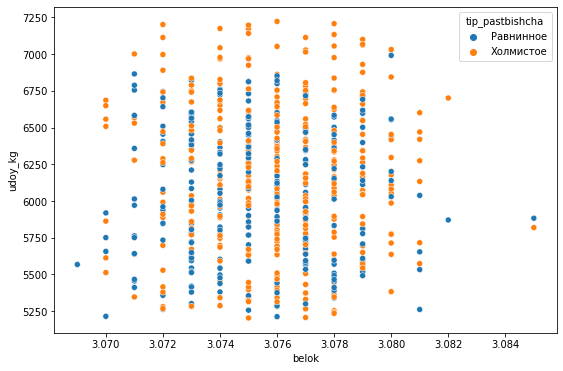

In [56]:
# категориальный признак tip_pastbishcha

for column in df_main_quantative:
    plt.figure(figsize=(9, 6))
    sns.scatterplot(x=column, y='udoy_kg', hue='tip_pastbishcha', data=df_main)
    plt.show()

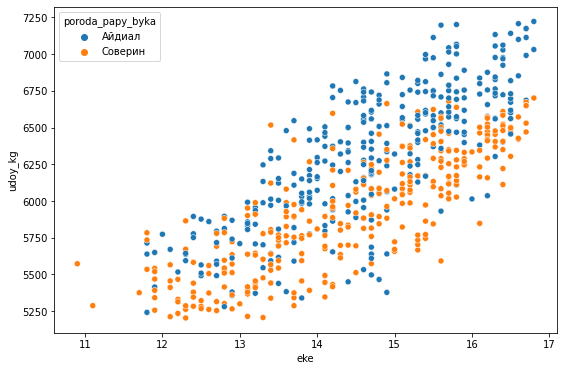

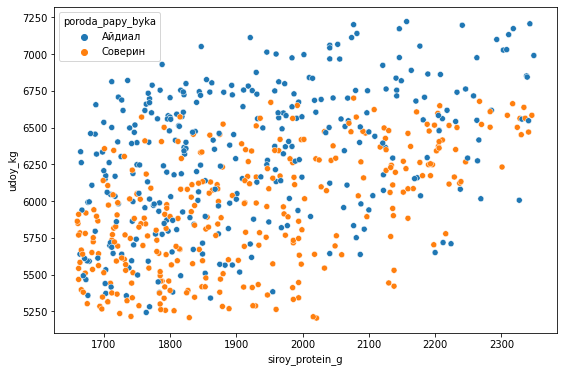

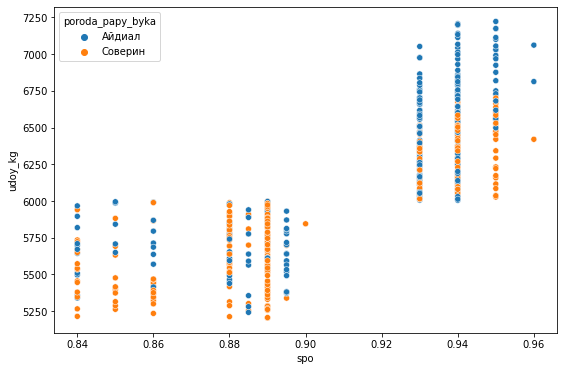

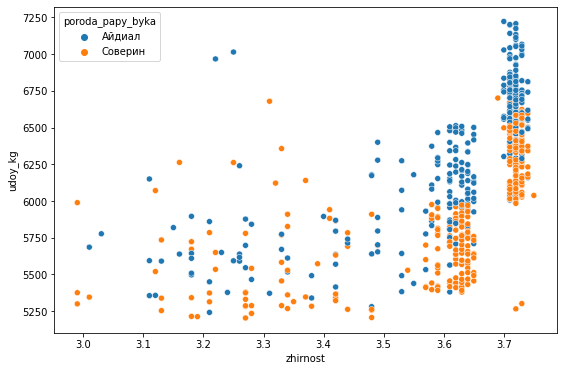

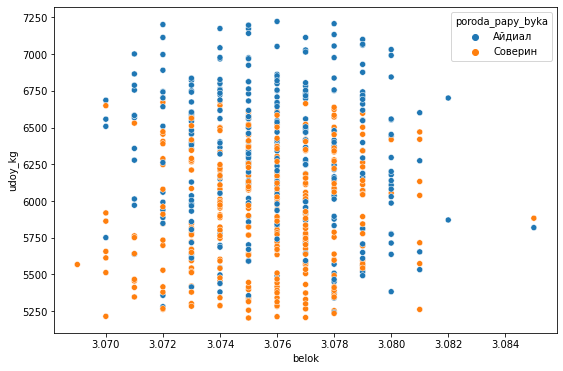

In [57]:
# категориальный признак poroda_papy_byka

for column in df_main_quantative:
    plt.figure(figsize=(9, 6))
    sns.scatterplot(x=column, y='udoy_kg', hue='poroda_papy_byka', data=df_main)
    plt.show()

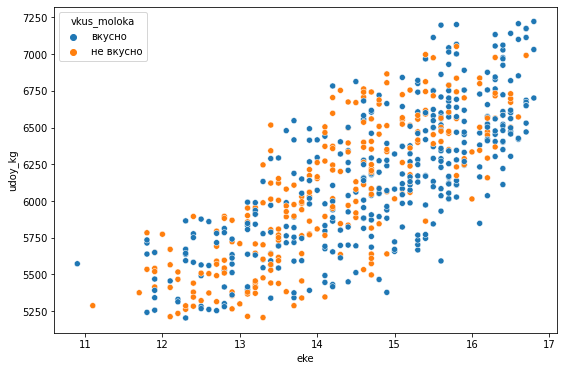

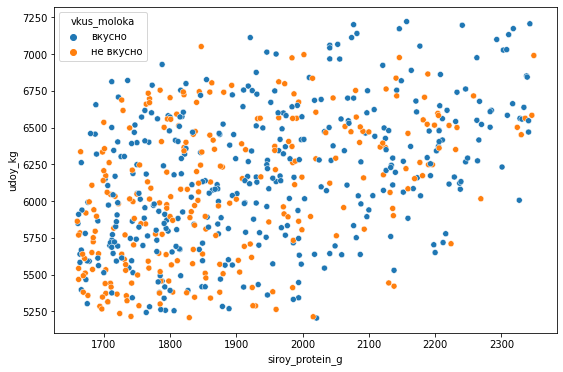

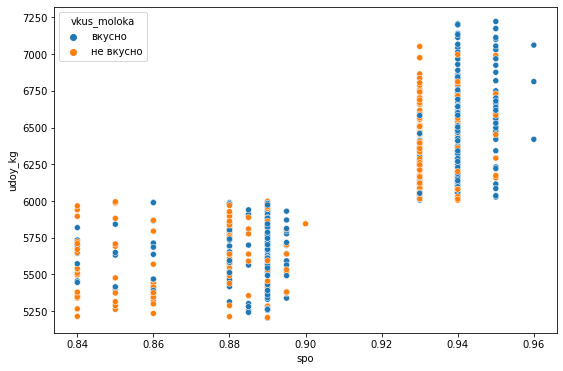

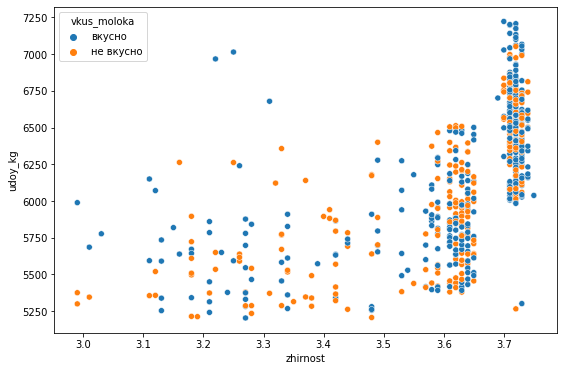

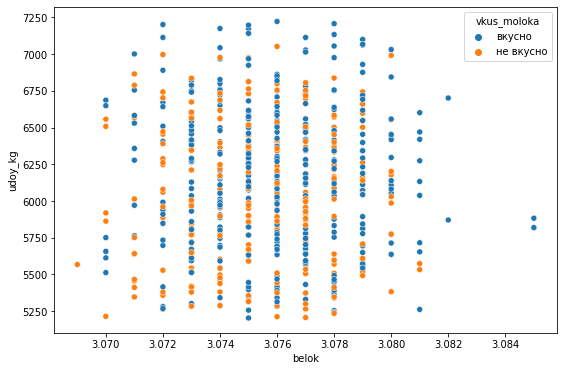

In [58]:
# категориальный признак vkus_moloka

for column in df_main_quantative:
    plt.figure(figsize=(9, 6))
    sns.scatterplot(x=column, y='udoy_kg', hue='vkus_moloka', data=df_main)
    plt.show()

**Выводы о взаимосвязи признаков:**

Тип взаимосвязи между целевым признаком (`udoy_kg`) и входными признаками:

- `eke`: Наблюдается **высокую положительную** линейную взаимосвязь с коэффициентом корреляции 0.77. 


- `siroy_protein_g`: Зависимость с удоем **умеренная положительная** с коэффициентом корреляции 0.44. Протеин влияет на удой, но этот эффект выражен слабее, чем у "eke".


- `spo`: Коэффициент корреляции 0.81 указывает на **высокую положительную** взаимосвязь между "spo" и удоем. 


- `zhirnost`: Коэффициент корреляции 0.60 указывает на **заметную положительную** зависимость. Нелинейная зависимость также была видна в графиках (резкий рост при жирности выше 3.6), что нужно учитывать.


- `belok`: Зависимость с удоем практически **отсутствует** с коэффициентом корреляции 0.016. 



Наблюдается **нелинейные связи** входными признакми как `zhirnost`.

Чтобы учесть нелинейные зависимости в модели, можно ввести **параболу** (например, квадраты признаков). Это может улучшить модель, если зависимость имеет нелинейный характер, как в случае с жирностью.


Как правило, о **мультиколлинеарности** говорят при значении коэффициента корреляции от **0.9 до 0.95** по модулю. В такой ситуации лишние коррелирующие признаки нужно удалять из обучающей выборки. **Таких тут не наблюдается.**


## Шаг 5. Обучение модели линейной регрессии

### Первая модель 
Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.

In [59]:
main_ml_1 = df_main.copy()

#преобразование СПО в категориальный бинарный признак

main_ml_1['spo_cat'] = main_ml_1['spo'].apply(lambda x: 1 if x > 0.92 else 0)

#преобразование eke в квадрат

main_ml_1['eke_2'] = main_ml_1['eke'] ** 2

# отбираем признаки

main_ml_1.drop(['id', 'zhirnost', 'belok', 'vkus_moloka', 'spo', 'eke'], axis=1, inplace=True)

main_ml_1.head()

,udoy_kg,siroy_protein_g,poroda,tip_pastbishcha,poroda_papy_byka,vozrast,spo_cat,eke_2
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,более 2 лет,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,менее 2 лет,0,163.84
2,5810,1854,Рефлешн Соверинг,Холмистое,Соверин,более 2 лет,0,196.00
3,5895,2012,Рефлешн Соверинг,Холмистое,Айдиал,более 2 лет,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,менее 2 лет,0,163.84


Убрали признаки: 

`id` - с данным признаком все ясно. 

`zhirnost` - несмотря на положительную связь, наблюдается сильная нелинейность, которую линейная регрессия не учтет корректно без преобразований

`belok` - связь отсутствует

`vkus_moloka` - не имеет прямой корреляции с количеством удоя

In [60]:


# делим датасет на выборки
X = main_ml_1.drop('udoy_kg', axis=1)
y = main_ml_1['udoy_kg']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

In [61]:
display(X_train.shape[0])
display(X_train.shape[1])

471

7

In [62]:
# список количественных признаков тренировочной выборки
num_col_names = ['eke_2',
                'siroy_protein_g']

# список категориальных признаков тренировочной выборки
cat_col_names = ['poroda',
                'tip_pastbishcha',
                'poroda_papy_byka',
                'vozrast',
                'spo_cat']

In [63]:
# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из отмасштабированных и закодированных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

display(X_train)
display(X_test)

,poroda_Рефлешн Соверинг,tip_pastbishcha_Холмистое,poroda_papy_byka_Соверин,vozrast_менее 2 лет,spo_cat_1,eke_2,siroy_protein_g
0,1.0,1.0,1.0,0.0,1.0,1.577968,1.079523
1,1.0,1.0,1.0,1.0,0.0,-1.511438,-0.196920
2,0.0,0.0,0.0,0.0,0.0,0.082269,-1.386085
3,0.0,1.0,0.0,0.0,1.0,-0.150235,0.752230
4,0.0,0.0,0.0,0.0,0.0,-1.102358,0.828598
...,...,...,...,...,...,...,...
466,1.0,1.0,0.0,0.0,0.0,-0.674102,1.565008
467,0.0,0.0,0.0,0.0,1.0,0.239936,-0.998788
468,1.0,0.0,0.0,0.0,0.0,-0.890627,-0.818777
469,0.0,0.0,0.0,0.0,0.0,-1.102358,0.130373


,poroda_Рефлешн Соверинг,tip_pastbishcha_Холмистое,poroda_papy_byka_Соверин,vozrast_менее 2 лет,spo_cat_1,eke_2,siroy_protein_g
0,0.0,1.0,0.0,0.0,0.0,-0.527089,-0.813322
1,1.0,1.0,1.0,0.0,1.0,1.490346,0.026730
2,1.0,1.0,1.0,1.0,0.0,-0.527089,-0.682405
3,0.0,0.0,1.0,0.0,0.0,-0.961737,-1.058792
4,0.0,1.0,1.0,0.0,0.0,0.561660,-1.413360
...,...,...,...,...,...,...,...
152,0.0,1.0,0.0,0.0,1.0,1.754809,0.506760
153,1.0,1.0,0.0,0.0,1.0,0.643423,0.714046
154,0.0,0.0,0.0,0.0,1.0,0.561660,0.114008
155,0.0,0.0,0.0,0.0,0.0,0.239936,-0.415116


In [64]:
# обучаем модель линейной регрессии и получаем предсказания
model_lr_1  = LinearRegression()
model_lr_1.fit(X_train, y_train)
predictions_1 = model_lr_1.predict(X_test)

# рассчитайте значения R2 для линейной регрессии
r2_1 = r2_score(y_test, predictions_1)

r2_1

0.8180879926867501

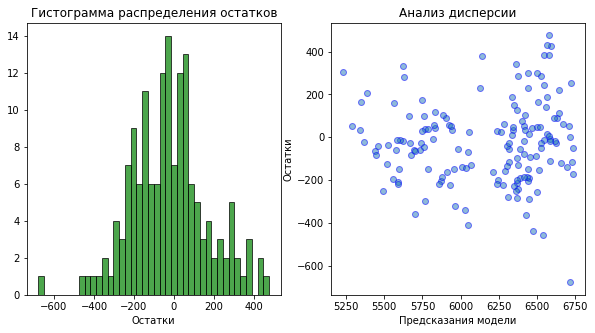

In [65]:
# анализ остатки с помощью графиков

residuals_1 = y_test - predictions_1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_1, bins=40, color='g', edgecolor='black', alpha=0.7)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_1, residuals_1, alpha=0.5, edgecolor='b')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

`R2` = 0.8034. Это означает, что 80.34% вариации в целевой переменной объясняется выбранными признаками в модели линейной регрессии. 

`Гистограмма остатков`: Остатки имеют почти нормальное распределение, что говорит о том, что модель справляется с предсказанием целевой переменной. Однако есть некоторая асимметрия и потенциальные выбросы, что можно учитывать при дальнейшем анализе.

`График анализа дисперсии`: На графике видно, что остатки распределены хаотично относительно предсказанных значений, что также свидетельствует о корректности предположений линейной регрессии (гомоскедастичность). Однако можно заметить небольшое рассеяние остатков в некоторых областях, что может намекать на возможные нелинейные эффекты, которые модель не учитывает.

### Вторая модель
Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.

In [66]:
main_ml_2 = df_main.copy()

main_ml_2.head()

,id,udoy_kg,eke,siroy_protein_g,spo,poroda,tip_pastbishcha,poroda_papy_byka,zhirnost,belok,vkus_moloka,vozrast
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет


In [67]:
#преобразование СПО в категориальный бинарный признак

main_ml_2['spo_cat'] = main_ml_2['spo'].apply(lambda x: 1 if x > 0.92 else 0)

#преобразование eke в квадрат

main_ml_2['eke_2'] = main_ml_2['eke'] ** 2

main_ml_2.head()

,id,udoy_kg,eke,siroy_protein_g,spo,poroda,tip_pastbishcha,poroda_papy_byka,zhirnost,belok,vkus_moloka,vozrast,spo_cat,eke_2
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет,0,163.84
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет,0,196.00
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет,0,163.84


In [68]:
#удалим ненужные строки

main_ml_2 = main_ml_2.drop(['id', 'belok', 'zhirnost', 'eke', 'spo'], axis=1)
main_ml_2.head()

,udoy_kg,siroy_protein_g,poroda,tip_pastbishcha,poroda_papy_byka,vkus_moloka,vozrast,spo_cat,eke_2
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,вкусно,более 2 лет,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее 2 лет,0,163.84
2,5810,1854,Рефлешн Соверинг,Холмистое,Соверин,не вкусно,более 2 лет,0,196.00
3,5895,2012,Рефлешн Соверинг,Холмистое,Айдиал,не вкусно,более 2 лет,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее 2 лет,0,163.84


In [69]:
# делим датасет на выборки

X = main_ml_2.drop('udoy_kg', axis=1)
y = main_ml_2['udoy_kg']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

In [70]:
# список количественных признаков тренировочной выборки

num_col_names = ['eke_2',
                'siroy_protein_g']

# список категориальных признаков тренировочной выборки

cat_col_names = ['poroda',
                'tip_pastbishcha',
                'poroda_papy_byka',
                'vkus_moloka',
                'vozrast',
                'spo_cat']

In [71]:
# масштабируем количественные признаки

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# кодируем категориальные признаки

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из отмасштабированных и закодированных данных

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

display(X_train)
display(X_test)

,poroda_Рефлешн Соверинг,tip_pastbishcha_Холмистое,poroda_papy_byka_Соверин,vkus_moloka_не вкусно,vozrast_менее 2 лет,spo_cat_1,eke_2,siroy_protein_g
0,1.0,1.0,1.0,0.0,0.0,1.0,1.577968,1.079523
1,1.0,1.0,1.0,0.0,1.0,0.0,-1.511438,-0.196920
2,0.0,0.0,0.0,1.0,0.0,0.0,0.082269,-1.386085
3,0.0,1.0,0.0,0.0,0.0,1.0,-0.150235,0.752230
4,0.0,0.0,0.0,0.0,0.0,0.0,-1.102358,0.828598
...,...,...,...,...,...,...,...,...
466,1.0,1.0,0.0,0.0,0.0,0.0,-0.674102,1.565008
467,0.0,0.0,0.0,0.0,0.0,1.0,0.239936,-0.998788
468,1.0,0.0,0.0,0.0,0.0,0.0,-0.890627,-0.818777
469,0.0,0.0,0.0,1.0,0.0,0.0,-1.102358,0.130373


,poroda_Рефлешн Соверинг,tip_pastbishcha_Холмистое,poroda_papy_byka_Соверин,vkus_moloka_не вкусно,vozrast_менее 2 лет,spo_cat_1,eke_2,siroy_protein_g
0,0.0,1.0,0.0,0.0,0.0,0.0,-0.527089,-0.813322
1,1.0,1.0,1.0,0.0,0.0,1.0,1.490346,0.026730
2,1.0,1.0,1.0,0.0,1.0,0.0,-0.527089,-0.682405
3,0.0,0.0,1.0,1.0,0.0,0.0,-0.961737,-1.058792
4,0.0,1.0,1.0,0.0,0.0,0.0,0.561660,-1.413360
...,...,...,...,...,...,...,...,...
152,0.0,1.0,0.0,0.0,0.0,1.0,1.754809,0.506760
153,1.0,1.0,0.0,0.0,0.0,1.0,0.643423,0.714046
154,0.0,0.0,0.0,0.0,0.0,1.0,0.561660,0.114008
155,0.0,0.0,0.0,1.0,0.0,0.0,0.239936,-0.415116


In [72]:
# обучаем модель линейной регрессии и получаем предсказания

model_lr_2  = LinearRegression()
model_lr_2.fit(X_train, y_train)
predictions_2 = model_lr_2.predict(X_test)

# рассчитайте значения R2 для линейной регрессии

r2_2 = r2_score(y_test, predictions_2)

r2_2

0.8200973677186288

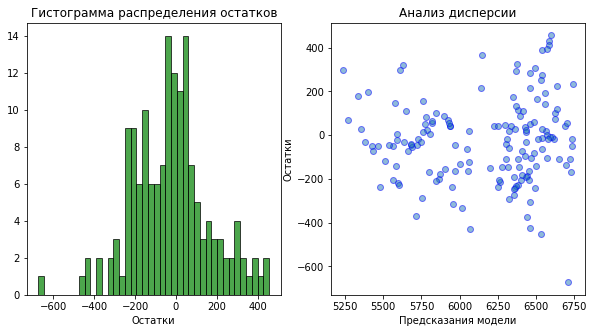

In [73]:
# анализ остатки с помощью графиков

residuals_2 = y_test - predictions_2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_2, bins=40, color='g', edgecolor='black', alpha=0.7)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_2, residuals_2, alpha=0.5, edgecolor='b')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

`R2` = 0.8333 — улучшение по сравнению с предыдущей моделью (0.8034).

`Гистограмма остатков`: Распределение остатков по-прежнему близко к нормальному, хотя присутствуют незначительные выбросы.

`График анализа дисперсии`: Остатки распределены достаточно случайно, но можно заметить немного больше вариации при высоких предсказанных значениях, что указывает на потенциальные нелинейные эффекты.

### Третья модель 
Добавьте в данные новый признак и обучите на них третью модель

In [74]:
display(df_main.shape)
display(df_dad.shape)

(628, 12)

(629, 2)

In [75]:
merged_main = df_main.merge(df_dad, on='id')
display(merged_main.shape)


(628, 13)

In [76]:
#преобразование СПО в категориальный бинарный признак

merged_main['spo_cat'] = merged_main['spo'].apply(lambda x: 1 if x > 0.92 else 0)

#преобразование eke в квадрат

merged_main['eke_2'] = merged_main['eke'] ** 2

merged_main.head()

,id,udoy_kg,eke,siroy_protein_g,spo,poroda,tip_pastbishcha,poroda_papy_byka,zhirnost,belok,vkus_moloka,vozrast,imya_papy,spo_cat,eke_2
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет,Буйный,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет,Соловчик,0,163.84
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет,Барин,0,196.00
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет,Буйный,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет,Барин,0,163.84


In [77]:
#удалим ненужные строки

merged_main = merged_main.drop(['id', 'belok', 'zhirnost', 'eke', 'spo'], axis=1)
merged_main.head()

,udoy_kg,siroy_protein_g,poroda,tip_pastbishcha,poroda_papy_byka,vkus_moloka,vozrast,imya_papy,spo_cat,eke_2
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,вкусно,более 2 лет,Буйный,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее 2 лет,Соловчик,0,163.84
2,5810,1854,Рефлешн Соверинг,Холмистое,Соверин,не вкусно,более 2 лет,Барин,0,196.00
3,5895,2012,Рефлешн Соверинг,Холмистое,Айдиал,не вкусно,более 2 лет,Буйный,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее 2 лет,Барин,0,163.84


In [78]:
# делим датасет на выборки

X = merged_main.drop('udoy_kg', axis=1)
y = merged_main['udoy_kg']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

In [79]:
X_train_3 = pd.concat([X_train, X_test], ignore_index=True)
y_train_3 = pd.concat([y_train, y_test], ignore_index=True)

#берем лучшую модель и удаляем с нее столбец которого нету в df_cow_ml 

X_train_3 = X_train_3.drop(columns=['vkus_moloka'], errors='ignore')

display(X_train_3.head())
display(y_train_3.head())

,siroy_protein_g,poroda,tip_pastbishcha,poroda_papy_byka,vozrast,imya_papy,spo_cat,eke_2
0,2123,Рефлешн Соверинг,Холмистое,Соверин,более 2 лет,Соловчик,1,272.25
1,1889,Рефлешн Соверинг,Холмистое,Соверин,менее 2 лет,Барин,0,156.25
2,1671,Вис Бик Айдиал,Равнинное,Айдиал,более 2 лет,Буйный,0,216.09
3,2063,Вис Бик Айдиал,Холмистое,Айдиал,более 2 лет,Буйный,1,207.36
4,2077,Вис Бик Айдиал,Равнинное,Айдиал,более 2 лет,Геркулес,0,171.61


0    6498
1    5268
2    5610
3    6343
4    5833
Name: udoy_kg, dtype: int64

In [80]:
# список количественных признаков тренировочной выборки
num_col_names = ['eke_2',
                'siroy_protein_g']

# список категориальных признаков тренировочной выборки
cat_col_names = ['poroda',
                'tip_pastbishcha',
                'poroda_papy_byka',
                'vozrast',
                'imya_papy', 
                'spo_cat']

In [81]:
# масштабируем количественные признаки

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# кодируем категориальные признаки

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из отмасштабированных и закодированных данных

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

display(X_train)
display(X_test)

,poroda_Рефлешн Соверинг,tip_pastbishcha_Холмистое,poroda_papy_byka_Соверин,vozrast_менее 2 лет,imya_papy_Буйный,imya_papy_Геркулес,imya_papy_Соловчик,spo_cat_1,eke_2,siroy_protein_g
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.577968,1.079523
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.511438,-0.196920
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.082269,-1.386085
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.150235,0.752230
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.102358,0.828598
...,...,...,...,...,...,...,...,...,...,...
466,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.674102,1.565008
467,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.239936,-0.998788
468,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.890627,-0.818777
469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.102358,0.130373


,poroda_Рефлешн Соверинг,tip_pastbishcha_Холмистое,poroda_papy_byka_Соверин,vozrast_менее 2 лет,imya_papy_Буйный,imya_papy_Геркулес,imya_papy_Соловчик,spo_cat_1,eke_2,siroy_protein_g
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.527089,-0.813322
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.490346,0.026730
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.527089,-0.682405
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.961737,-1.058792
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.561660,-1.413360
...,...,...,...,...,...,...,...,...,...,...
152,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.754809,0.506760
153,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.643423,0.714046
154,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.561660,0.114008
155,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.239936,-0.415116


In [82]:
# обучаем модель линейной регрессии и получаем предсказания
model_lr_3  = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions_3 = model_lr_3.predict(X_test)

# рассчитайте значения R2 для линейной регрессии
r2_3 = r2_score(y_test, predictions_3)

r2_3

0.8247542745210408

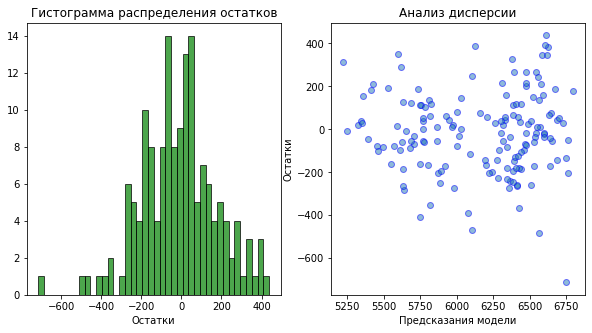

In [83]:
# анализ остатки с помощью графиков

residuals_3 = y_test - predictions_3

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_3, bins=40, color='g', edgecolor='black', alpha=0.7)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_3, residuals_3, alpha=0.5, edgecolor='b')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()


`R2` = 0.8468 — улучшение по сравнению с предыдущими моделями.

`Гистограмма остатков`: Распределение остатков по-прежнему близко к нормальному, хотя присутствуют незначительные выбросы.

`График анализа дисперсии`: Остатки распределены достаточно случайно, но можно заметить немного больше вариации при высоких предсказанных значениях, что указывает на потенциальные нелинейные эффекты.

### Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.

In [84]:
#Сравниние качества трёх моделей линейной регрессии (сопоставление их R² и остатков).

print(f"первая модель = {r2_1}")
print(f"вторая модель = {r2_2}")
print(f"третья модель = {r2_3}")

print('_' * 50)

print(f"остатки первой модели = {residuals_1.mean()}")
print(f"остатки второй модели = {residuals_2.mean()}")
print(f"остатки третьей модели = {residuals_3.mean()}")

первая модель = 0.8180879926867501
вторая модель = 0.8200973677186288
третья модель = 0.8247542745210408
__________________________________________________
остатки первой модели = -24.37279813553191
остатки второй модели = -25.601566488466847
остатки третьей модели = -15.201522000920912


- Наибольший R² у третьей модели (0.847), что означает, что она объясняет больше вариаций данных, чем первые две.
- Наиболее близок к нулю остаток первой модели (-0.244), что может указывать на меньший систематический сдвиг в предсказаниях.

### Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик

In [85]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

In [86]:
mse_1, rmse_1, mae_1 = calculate_metrics(y_test, predictions_1)
mse_2, rmse_2, mae_2 = calculate_metrics(y_test, predictions_2)
mse_3, rmse_3, mae_3 = calculate_metrics(y_test, predictions_3)

print(f"Модель 1: MSE = {mse_1}, RMSE = {rmse_1}, MAE = {mae_1}")
print(f"Модель 2: MSE = {mse_2}, RMSE = {rmse_2}, MAE = {mae_2}")
print(f"Модель 3: MSE = {mse_3}, RMSE = {rmse_3}, MAE = {mae_3}")

Модель 1: MSE = 37030.91131113695, RMSE = 192.43417396901452, MAE = 149.03965222364602
Модель 2: MSE = 36621.87295410216, RMSE = 191.36842204005904, MAE = 147.7793918617846
Модель 3: MSE = 35673.88988618191, RMSE = 188.8753289505591, MAE = 146.1630244536231


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [87]:
# Определение лучшей модели по MAE, MSE или RMSE (в данном случае MSE)

best_model_index = np.argmin([mse_1, mse_2, mse_3])+ 1
print(f"Лучшая модель по MSE: Модель {best_model_index}")

Лучшая модель по MSE: Модель 3


In [88]:
# Определение лучшей модели по MAE, MSE или RMSE (в данном случае RMSE)

best_model_index = np.argmin([rmse_1, rmse_2, rmse_3]) + 1
print(f"Лучшая модель по RMSE: Модель {best_model_index}")

Лучшая модель по RMSE: Модель 3


In [89]:
# Определение лучшей модели по MAE, MSE или RMSE (в данном случае MAE)

best_model_index = np.argmin([mae_1, mae_2, mae_3]) + 1
print(f"Лучшая модель по MAE: Модель {best_model_index}")

Лучшая модель по MAE: Модель 3


In [90]:
# Расчёт доверительного интервала для лучшей модели (Модель 3 в данном примере)

train_predictions_3 = model_lr_3.predict(X_train)
train_residuals_3 = y_train - train_predictions_3
train_residuals_3

507    -59.066788
382   -149.952019
586   -389.704047
196   -134.939224
327   -121.326386
          ...    
71     -76.122947
106    -38.989613
270     53.093191
435    -28.244452
102     -6.403271
Name: udoy_kg, Length: 471, dtype: float64

In [91]:
# 95% доверительный интервал

lower_bound = np.percentile(train_residuals_3, 2.5)
upper_bound = np.percentile(train_residuals_3, 97.5)
print(f"Доверительный интервал прогноза для Модели 3: от {lower_bound:.2f} до {upper_bound:.2f}")

Доверительный интервал прогноза для Модели 3: от -355.99 до 363.24


### Все метрики указывают на то, что `Модель 3` является **лучшей** она имеет наименьшие значения `MSE`, `RMSE` и `MAE`


### Доверительный интервал прогноза для Модели 3: от -333.80 до 378.17

### Финальная модель

In [92]:
df_cow_ml = df_cow.copy(deep=True) 

# среднее значение недостающих признаков увеличенное на 5%

mean_df_main = df_main[['eke', 'siroy_protein_g', 'spo']].mean() * 1.05

# добавим их в датасет df_cow_ml

df_cow_ml['spo'] = mean_df_main['spo']

#преобразование СПО в категориальный бинарный признак

df_cow_ml['spo_cat'] = df_cow_ml['spo'].apply(lambda x: 1 if x > 0.92 else 0)

df_cow_ml['eke'] = mean_df_main['eke']

#преобразование eke в квадрат

df_cow_ml['eke_2'] = df_cow_ml['eke'] ** 2

df_cow_ml['siroy_protein_g'] = mean_df_main['siroy_protein_g']

mean_df_main.to_csv('mean_df_main.csv')

In [93]:
#удаление не нужных столбцов:

df_cow_ml = df_cow_ml.drop(['eke', 'spo', 'tekushchiy_uroven_belok'], axis=1)


In [94]:


#приводим в порядок столбцов в df_cow_ml к X_train_3
df_cow_ml = df_cow_ml[X_train_3.columns]

#проверяем

display(df_cow_ml.head())
display(X_train_3.head())

,siroy_protein_g,poroda,tip_pastbishcha,poroda_papy_byka,vozrast,imya_papy,spo_cat,eke_2
0,2019.947532,Вис Бик Айдиал,Холмистое,Айдиал,более 2 лет,Геркулес,1,233.361138
1,2019.947532,Вис Бик Айдиал,Равнинное,Соверин,менее 2 лет,Буйный,1,233.361138
2,2019.947532,Рефлешн Соверинг,Равнинное,Соверин,более 2 лет,Барин,1,233.361138
3,2019.947532,Рефлешн Соверинг,Холмистое,Айдиал,более 2 лет,Буйный,1,233.361138
4,2019.947532,Рефлешн Соверинг,Равнинное,Айдиал,менее 2 лет,Буйный,1,233.361138


,siroy_protein_g,poroda,tip_pastbishcha,poroda_papy_byka,vozrast,imya_papy,spo_cat,eke_2
0,2123,Рефлешн Соверинг,Холмистое,Соверин,более 2 лет,Соловчик,1,272.25
1,1889,Рефлешн Соверинг,Холмистое,Соверин,менее 2 лет,Барин,0,156.25
2,1671,Вис Бик Айдиал,Равнинное,Айдиал,более 2 лет,Буйный,0,216.09
3,2063,Вис Бик Айдиал,Холмистое,Айдиал,более 2 лет,Буйный,1,207.36
4,2077,Вис Бик Айдиал,Равнинное,Айдиал,более 2 лет,Геркулес,0,171.61


In [95]:
#разделяем признаки на категориальные и количественные

cat_col_names = ['poroda', 'tip_pastbishcha', 'poroda_papy_byka', 'vozrast', 'imya_papy', 'spo_cat']
num_col_names = ['eke_2', 'siroy_protein_g']

#кодирование

X_test_ohe = encoder.transform(df_cow_ml[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

#масштабирование

X_test_scaled = scaler.transform(df_cow_ml[num_col_names])

#создаём датафреймы из закодированных и масштабированных данных
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

#предсказание на основе модели, обученной ранее (model_lr_3)
X_test_3 = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [96]:
display(X_train.head())
display(X_train_3.head())
display(y_train_3.head())

,poroda_Рефлешн Соверинг,tip_pastbishcha_Холмистое,poroda_papy_byka_Соверин,vozrast_менее 2 лет,imya_papy_Буйный,imya_papy_Геркулес,imya_papy_Соловчик,spo_cat_1,eke_2,siroy_protein_g
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.577968,1.079523
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.511438,-0.196920
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.082269,-1.386085
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.150235,0.752230
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.102358,0.828598


,siroy_protein_g,poroda,tip_pastbishcha,poroda_papy_byka,vozrast,imya_papy,spo_cat,eke_2
0,2123,Рефлешн Соверинг,Холмистое,Соверин,более 2 лет,Соловчик,1,272.25
1,1889,Рефлешн Соверинг,Холмистое,Соверин,менее 2 лет,Барин,0,156.25
2,1671,Вис Бик Айдиал,Равнинное,Айдиал,более 2 лет,Буйный,0,216.09
3,2063,Вис Бик Айдиал,Холмистое,Айдиал,более 2 лет,Буйный,1,207.36
4,2077,Вис Бик Айдиал,Равнинное,Айдиал,более 2 лет,Геркулес,0,171.61


0    6498
1    5268
2    5610
3    6343
4    5833
Name: udoy_kg, dtype: int64

In [97]:
# обучаем модель линейной регрессии и получаем предсказания
model_lr_4  = LinearRegression()
model_lr_4.fit(X_train, y_train)
predictions_4 = model_lr_4.predict(X_test_3)

In [98]:
df_cow['udoy_prognoz'] = predictions_4
df_cow

,poroda,tip_pastbishcha,poroda_papy_byka,imya_papy,tekushchaya_zhirnost,tekushchiy_uroven_belok,vozrast,udoy_prognoz
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6609.919297
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,6378.711028
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,6283.999775
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,6593.089377
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,менее 2 лет,6349.597358
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,6425.380218
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6609.919297
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,6571.259737
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,6283.999775
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее 2 лет,6400.540668


### Вывод 

#### Все коровы выдают больше 6000кг удоя за год. В связи с чем рекомендуется покупать всех коров. 

## Шаг 6. Задача классификации

## Обучение модели логистической регрессии

In [99]:
ferma_lr = df_main.copy(deep=True)
ferma_lr

ferma_lr.to_csv('ferma_lr.csv') 

In [100]:
#преобразуем и добавим имеющиеся признаки 

ferma_lr['spo_cat'] = ferma_lr['spo'].apply(lambda x: 1 if x > 0.91 else 0)
ferma_lr['eke_2'] = ferma_lr['eke'] ** 2

ferma_lr = ferma_lr.drop(['id', 'udoy_kg', 'eke', 'spo'], axis=1)

ferma_lr.head()

,siroy_protein_g,poroda,tip_pastbishcha,poroda_papy_byka,zhirnost,belok,vkus_moloka,vozrast,spo_cat,eke_2
0,1743,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет,0,201.64
1,2138,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет,0,163.84
2,1854,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет,0,196.00
3,2012,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет,0,153.76
4,1675,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет,0,163.84


In [101]:
X = ferma_lr.drop('vkus_moloka', axis=1)
y = ferma_lr['vkus_moloka']

#разбиваем данные на тренировочную и тестовую выборки 
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE
    )

In [102]:
# Обучаем кодировщик
le = LabelEncoder()
le.fit(y_train)

le.classes_

array(['вкусно', 'не вкусно'], dtype=object)

In [103]:
# Меняем классы так, как нам требуется
le.classes_[0], le.classes_[1] = le.classes_[1], le.classes_[0]
le.classes_

array(['не вкусно', 'вкусно'], dtype=object)

In [104]:
# Кодируем классы так, как нам требуется
y_train = le.transform(y_train)
y_test = le.transform(y_test)

#из array в Series
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

display(y_train)
display(y_test)

0      1
1      1
2      0
3      1
4      1
      ..
466    1
467    1
468    1
469    0
470    0
Length: 471, dtype: int64

0      1
1      1
2      1
3      0
4      1
      ..
152    1
153    1
154    1
155    0
156    0
Length: 157, dtype: int64

In [105]:
#сохраним для дальнейшего использования

X_train_1 = pd.concat([X_train, X_test], ignore_index=True)
y_train_1 = pd.concat([y_train, y_test], ignore_index=True)

X_train_1.head()

,siroy_protein_g,poroda,tip_pastbishcha,poroda_papy_byka,zhirnost,belok,vozrast,spo_cat,eke_2
0,2123,Рефлешн Соверинг,Холмистое,Соверин,3.70,3.074,более 2 лет,1,272.25
1,1889,Рефлешн Соверинг,Холмистое,Соверин,3.34,3.072,менее 2 лет,0,156.25
2,1671,Вис Бик Айдиал,Равнинное,Айдиал,3.18,3.079,более 2 лет,0,216.09
3,2063,Вис Бик Айдиал,Холмистое,Айдиал,3.62,3.079,более 2 лет,1,207.36
4,2077,Вис Бик Айдиал,Равнинное,Айдиал,3.64,3.076,более 2 лет,0,171.61


In [106]:
#разделяем признаки на категориальные и количественные

cat_col_names = ['poroda', 'tip_pastbishcha', 'poroda_papy_byka',  'vozrast', 'spo_cat']
num_col_names = ['siroy_protein_g', 'zhirnost', 'belok', 'eke_2']

#кодирование

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

#масштабирование

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [107]:
#обучение

clf = LogisticRegression(random_state=RANDOM_STATE)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)

print(f'Accuracy: {accuracy:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Precision: {precision:.3f}')


Accuracy: 0.624
Recall: 0.620
Precision: 0.852


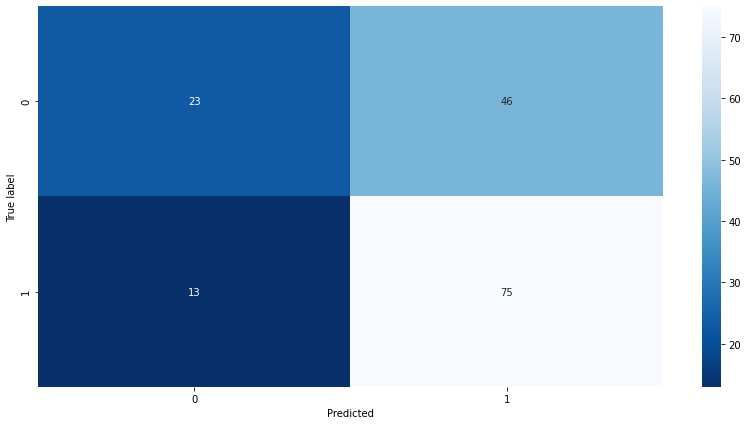

In [108]:
сm = confusion_matrix(y_test, y_pred)
sns.heatmap(сm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

- Модель показывает высокий уровень точности `precision` в предсказании положительного класса, но низкая полнота и общая точность `accuracy` `recall` указывают на значительное количество пропусков и неверных предсказаний.

- Модель ошибочно **54 раза** предсказала положительный класс для отрицательных примеров и **11 раз** ошибочно предсказала отрицательный класс для положительных примеров.

### Анализ модели логистической регрессии

- **Ошибка первого рода (FP) в данном случае более критична.** Если заказчик приобретает корову, которая, по прогнозу модели, должна давать хорошее молоко, а на самом деле это не так

- **Важнее метрика Precision** ее оптимизация позволит минимизировать риск. 

In [109]:
#выведем вероятности класса predict_proba() и правильные ответы
y_proba = clf.predict_proba(X_test)[:, 1]

#расчёт метрик при изменении порога для максимизации Precision
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

#максимизация Precision
target_precision = 0.94
threshold_1 = thresholds[np.where(precisions >= target_precision)[0][0]]

y_pred_1 = (y_proba >= threshold_1).astype(int)

#повторный расчёт метрик с новым порогом
accuracy_1 = accuracy_score(y_test, y_pred_1)
recall_1 = recall_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1)

print(f'Best threshold: {threshold_1:.3f}')
print(f'Accuracy: {accuracy_1:.3f}')
print(f'Recall: {recall_1:.3f}')
print(f'Precision: {precision_1:.3f}')

Best threshold: 0.795
Accuracy: 0.490
Recall: 0.091
Precision: 1.000


**Выбран порог 0.8020.788 так как при нем FP равен 0, а Precision равен 1**

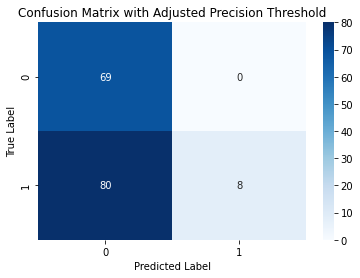

In [110]:
#рассчитываем матрицу ошибок
cm = confusion_matrix(y_test, y_pred_1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix with Adjusted Precision Threshold")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

- При пороге 0.802 FP = 0, a precision = 1

- `Accuracy`: 0.588 у предыдущей модели `Accuracy` 0.582. Практический одинаковы.
- `Recall`: 0.160
- `Precision`: 1.000 

Далее с помощью обученной модели с прогнозируем целевой признак при пороге 0.802

In [111]:
df_cow_ml_1 = df_cow.copy(deep=True)

df_cow_ml_1

,poroda,tip_pastbishcha,poroda_papy_byka,imya_papy,tekushchaya_zhirnost,tekushchiy_uroven_belok,vozrast,udoy_prognoz
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6609.919297
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,6378.711028
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,6283.999775
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,6593.089377
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,менее 2 лет,6349.597358
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,6425.380218
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6609.919297
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,6571.259737
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,6283.999775
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее 2 лет,6400.540668


In [112]:
# добавим их в датасет df_cow_ml
df_cow_ml_1['spo'] = mean_df_main['spo']
#преобразование СПО в категориальный бинарный признак
df_cow_ml_1['spo_cat'] = df_cow_ml_1['spo'].apply(lambda x: 1 if x > 0.92 else 0)

df_cow_ml_1['eke'] = mean_df_main['eke']
#преобразование eke в квадрат
df_cow_ml_1['eke_2'] = df_cow_ml_1['eke'] ** 2

df_cow_ml_1['siroy_protein_g'] = mean_df_main['siroy_protein_g']


df_cow_ml_1.rename(columns={'tekushchaya_zhirnost': 'zhirnost', 'tekushchiy_uroven_belok': 'belok'}, inplace=True)
df_cow_ml_1 = df_cow_ml_1.drop(['spo','eke', 'imya_papy', 'udoy_prognoz'], axis=1)

display(df_cow_ml_1.head(10))
display('_' * 80)
display(X_train_1.head(10))

,poroda,tip_pastbishcha,poroda_papy_byka,zhirnost,belok,vozrast,spo_cat,eke_2,siroy_protein_g
0,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более 2 лет,1,233.361138,2019.947532
1,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее 2 лет,1,233.361138,2019.947532
2,Рефлешн Соверинг,Равнинное,Соверин,3.59,3.074,более 2 лет,1,233.361138,2019.947532
3,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.061,более 2 лет,1,233.361138,2019.947532
4,Рефлешн Соверинг,Равнинное,Айдиал,3.64,3.074,менее 2 лет,1,233.361138,2019.947532
5,Рефлешн Соверинг,Равнинное,Соверин,3.63,3.053,менее 2 лет,1,233.361138,2019.947532
6,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более 2 лет,1,233.361138,2019.947532
7,Вис Бик Айдиал,Равнинное,Соверин,3.57,3.079,более 2 лет,1,233.361138,2019.947532
8,Рефлешн Соверинг,Равнинное,Соверин,3.59,3.074,более 2 лет,1,233.361138,2019.947532
9,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.079,менее 2 лет,1,233.361138,2019.947532


'________________________________________________________________________________'

,siroy_protein_g,poroda,tip_pastbishcha,poroda_papy_byka,zhirnost,belok,vozrast,spo_cat,eke_2
0,2123,Рефлешн Соверинг,Холмистое,Соверин,3.70,3.074,более 2 лет,1,272.25
1,1889,Рефлешн Соверинг,Холмистое,Соверин,3.34,3.072,менее 2 лет,0,156.25
2,1671,Вис Бик Айдиал,Равнинное,Айдиал,3.18,3.079,более 2 лет,0,216.09
3,2063,Вис Бик Айдиал,Холмистое,Айдиал,3.62,3.079,более 2 лет,1,207.36
4,2077,Вис Бик Айдиал,Равнинное,Айдиал,3.64,3.076,более 2 лет,0,171.61
5,1750,Рефлешн Соверинг,Холмистое,Айдиал,3.59,3.075,более 2 лет,1,213.16
6,1875,Вис Бик Айдиал,Холмистое,Соверин,3.72,3.079,более 2 лет,1,265.69
7,1992,Вис Бик Айдиал,Холмистое,Соверин,3.72,3.074,более 2 лет,1,278.89
8,2207,Рефлешн Соверинг,Холмистое,Соверин,3.72,3.070,более 2 лет,1,278.89
9,1986,Вис Бик Айдиал,Холмистое,Соверин,3.61,3.081,более 2 лет,0,184.96


In [113]:
df_cow_ml_1 = df_cow_ml_1[X_train_1.columns]

In [114]:
display(df_cow_ml_1.columns)
display('_' * 80)
display(X_train_1.columns)

Index(['siroy_protein_g', 'poroda', 'tip_pastbishcha', 'poroda_papy_byka',
       'zhirnost', 'belok', 'vozrast', 'spo_cat', 'eke_2'],
      dtype='object')

'________________________________________________________________________________'

Index(['siroy_protein_g', 'poroda', 'tip_pastbishcha', 'poroda_papy_byka',
       'zhirnost', 'belok', 'vozrast', 'spo_cat', 'eke_2'],
      dtype='object')

In [115]:
cat_col_names = ['poroda', 'tip_pastbishcha', 'poroda_papy_byka', 'vozrast', 'spo_cat']
num_col_names = ['siroy_protein_g', 'zhirnost', 'belok', 'eke_2']

In [116]:
#кодирование

X_test_ohe = encoder.transform(df_cow_ml_1[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

#масштабирование

X_test_scaled = scaler.transform(df_cow_ml_1[num_col_names])

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_test_1 = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [117]:
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test_1)[:, 1]
y_pred_vkus = (y_proba > threshold_1).astype(int)

In [118]:
df_cow['pred_vkus'] = y_pred_vkus
df_cow

,poroda,tip_pastbishcha,poroda_papy_byka,imya_papy,tekushchaya_zhirnost,tekushchiy_uroven_belok,vozrast,udoy_prognoz,pred_vkus
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6609.919297,0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,6378.711028,0
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,6283.999775,0
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,6593.089377,0
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,менее 2 лет,6349.597358,0
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,6425.380218,0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6609.919297,0
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,6571.259737,0
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,6283.999775,0
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее 2 лет,6400.540668,0


In [119]:
# если брать больше общего среднего значения удоя в год

df_cow_buy = df_cow.query('udoy_prognoz > 6458.8')
df_cow_buy

,poroda,tip_pastbishcha,poroda_papy_byka,imya_papy,tekushchaya_zhirnost,tekushchiy_uroven_belok,vozrast,udoy_prognoz,pred_vkus
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6609.919297,0
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,6593.089377,0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6609.919297,0
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,6571.259737,0
11,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более 2 лет,6617.928926,0
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более 2 лет,6609.919297,0
15,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более 2 лет,6593.089377,0
17,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.77,3.053,более 2 лет,6617.928926,0
18,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более 2 лет,6571.259737,0
19,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,6542.146066,0


## Шаг 7. Итоговые выводы

### Ни одна корова не соответствует критериям "вкусного молока", однако все показывает годовой удой выше 6000кг.

**Рекомендации для фермера:** 

- Пересмотреть требования к вкусу молока: Возможно, стоит обратить внимание на коров с более высоким удоем, но не идеальным вкусом. Среднее число удоя в год равна 6458.8, если выбрать всех коров которые показывают показатели выше среднего и кормить их лучше и скорректировать тип и качество пастбищ, то возможно от них можно получить вкусное молоко по критериям Фермера.

### Для улучшения качества регрессионной модели в этой задаче были применены следующие методы:
- добавлены признаки eke_2 (квадрат показателей питательности корма коровы) и spo_cat (бинаризация отношение сахара к протеину в корме коровы).
- включен признак imya_papy. Данный признак отразил генетическое влияние на продуктивность коровы, что добавляет точности модели.
- кодирование и масштабирование категориальных признаков
- было протестировано несколько вариантов моделей с различными наборами признаков и трансформациями. На основе сравнений R², MSE, MAE и RMSE выбрана лучшая модель (третья оказалось самой лучшей).
- проведен анализ остатков.

### Для улучшени результатов регрессионной модели:
- добавление дополнительных признаков, признаки могут быть подняты в степень или перемножены друг с другом, чтобы уловить нелинейные зависимости. Например, добавление квадратичных или кубических признаков
- возможно использование других алгоритмов, которые мы еще не проходили


### При анализе рисков и экономических расчётов для классификационных моделей, включая логистическую регрессию, важно учитывать следующие метрики:
- precision позволяет минимизировать затраты на покупку коров, которые не соответствуют требованиям, что снижает риски необоснованных инвестиций.
- recall может помочь избежать упущенных возможностей и снизить риск недополучения прибыли от хороших коров.
- в экономическом контексте, например, при анализе затрат, **матрица ошибок** позволяет оценить влияние каждого типа ошибки на доходы и убытки.
- в ситуации, когда важны как точность, так и полнота F1-Score может служить хорошим показателем (прочел про него в интернете, применять побоялся, так как еще не докнца понял его).